
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

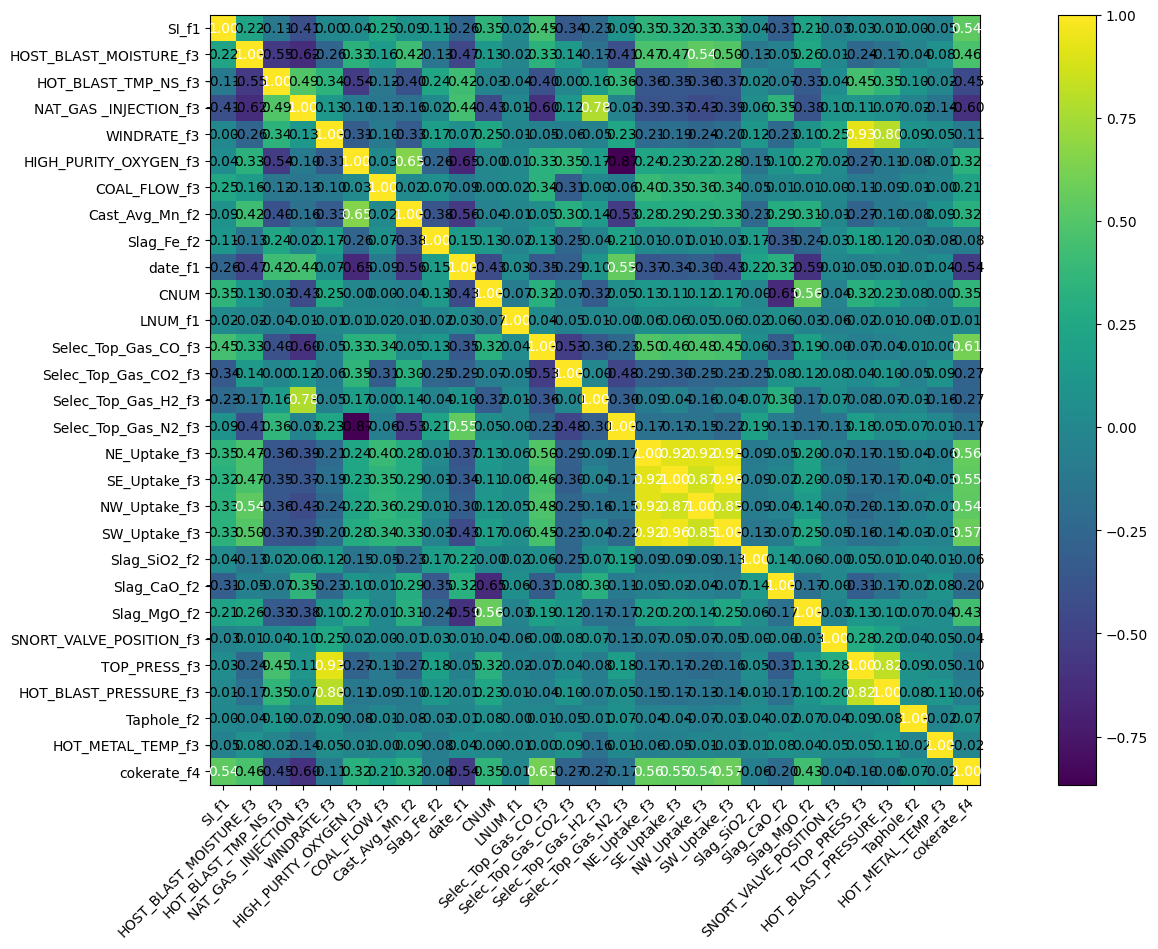

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

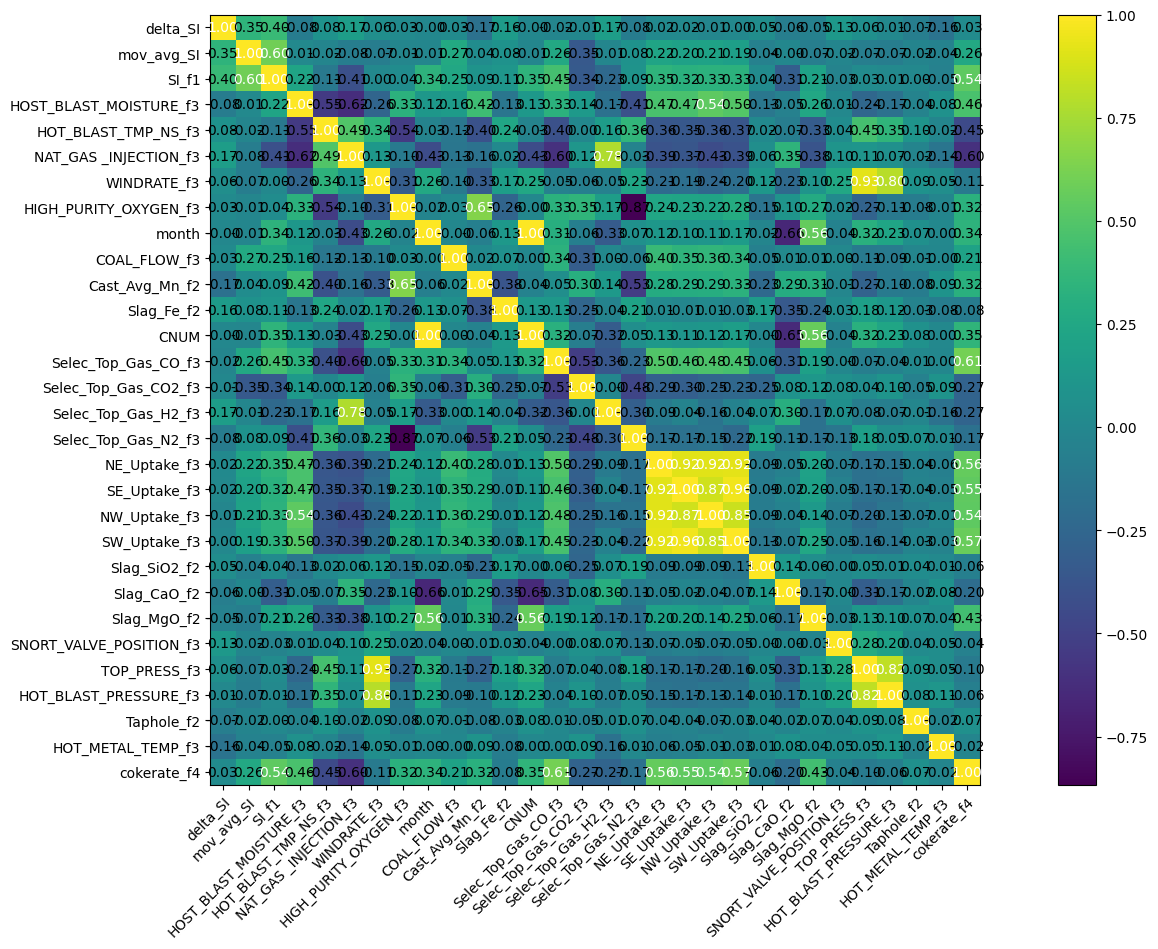

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.702623
Loss_SI: 0.6228456497192383 Loss_all: 1.4206222295761108
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.100721
Loss_SI: 0.043603818863630295 Loss_all: 0.6147804856300354
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.072731
Loss_SI: 0.016386540606617928 Loss_all: 0.5798343420028687
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.066608
Loss_SI: 0.02100422792136669 Loss_all: 0.4770430624485016
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.038113
Loss_SI: 0.006573674734681845 Loss_all: 0.3219698667526245
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.041404
Loss_SI: 0.008909272029995918 Loss_all: 0.3338565528392792
Prediction shape: torch.Size([32, 35])
===


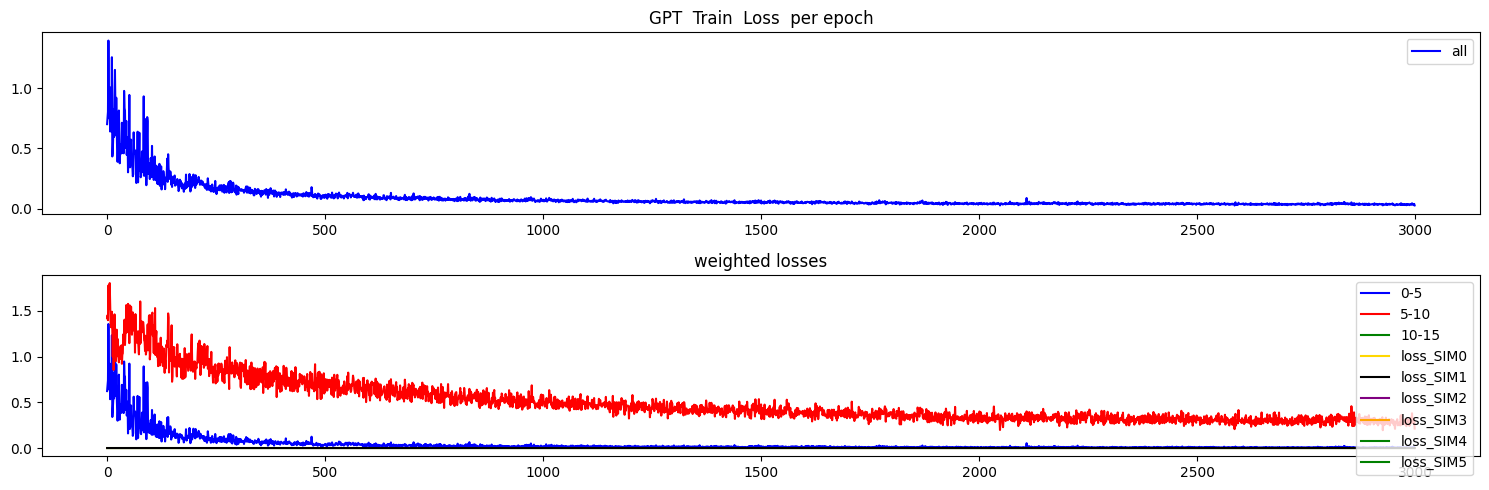

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


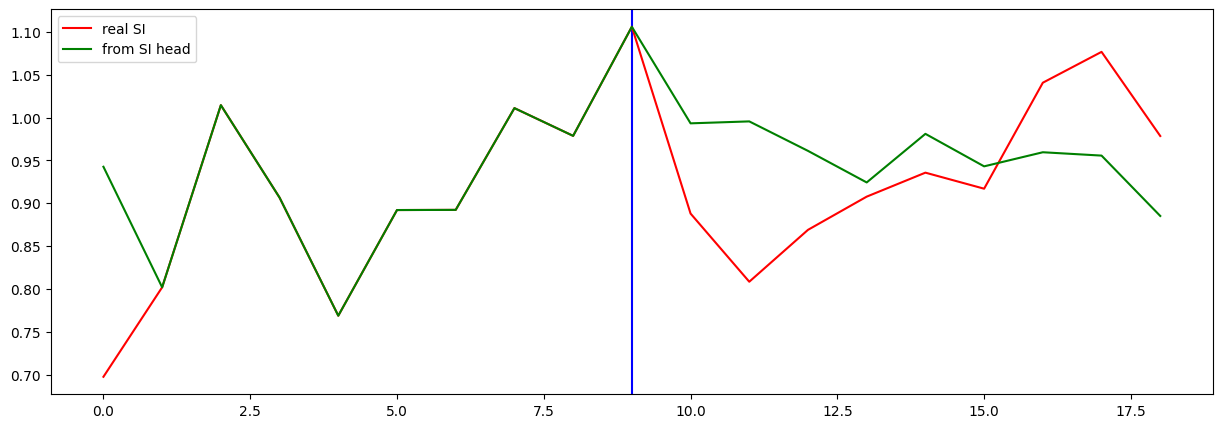

Testing R**2 - (all) - (no inputs):  0.9557900861859476
Testing R**2 - (f2) - SI full (no inputs):  -0.8934907103523653
Testing R**2 - SI head only (no inputs):  -0.08419843340859123
0 ...index R**2 (no inputs):  -0.15121243294670395
1 ...index R**2 (no inputs):  -0.05672011343451855
2 ...index R**2 (no inputs):  -0.8934907103523653
3 ...index R**2 (no inputs):  -21.735477731522344
4 ...index R**2 (no inputs):  -286.84975634702874
5 ...index R**2 (no inputs):  -2.2646860072881254
6 ...index R**2 (no inputs):  -78.15489590174774
7 ...index R**2 (no inputs):  -3.215055689078789
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.10473228365424814
10 ...index R**2 (no inputs):  -0.08300419618136123
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -13.628719644036885
16 ...index R**2 (no inputs):  -1.4801748115668008
17 ...index R**2 (no inputs):  -76.158

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.891710
Loss_SI: 0.8379615545272827 Loss_all: 1.375450849533081
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.170660
Loss_SI: 0.0899612158536911 Loss_all: 0.8969491124153137
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.112717
Loss_SI: 0.04812502861022949 Loss_all: 0.6940475106239319
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.087201
Loss_SI: 0.034894514828920364 Loss_all: 0.5579546093940735
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.061905
Loss_SI: 0.018498197197914124 Loss_all: 0.4525681734085083
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.064060
Loss_SI: 0.023985426872968674 Loss_all: 0.4247358739376068
Prediction shape: torch.Size([32, 35])
===


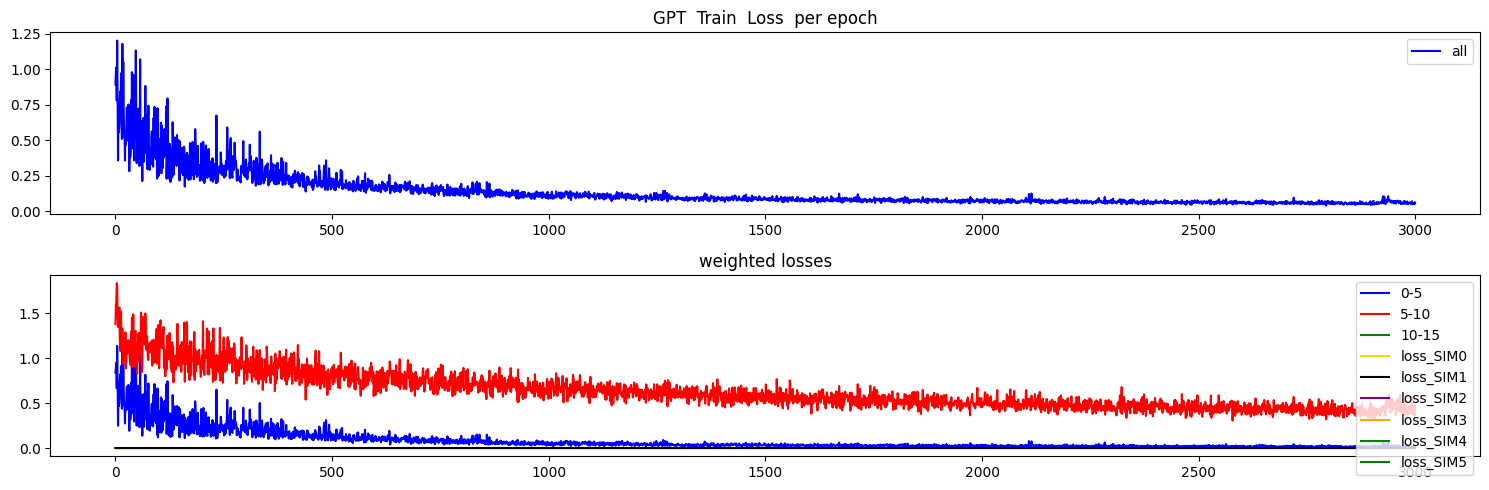

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


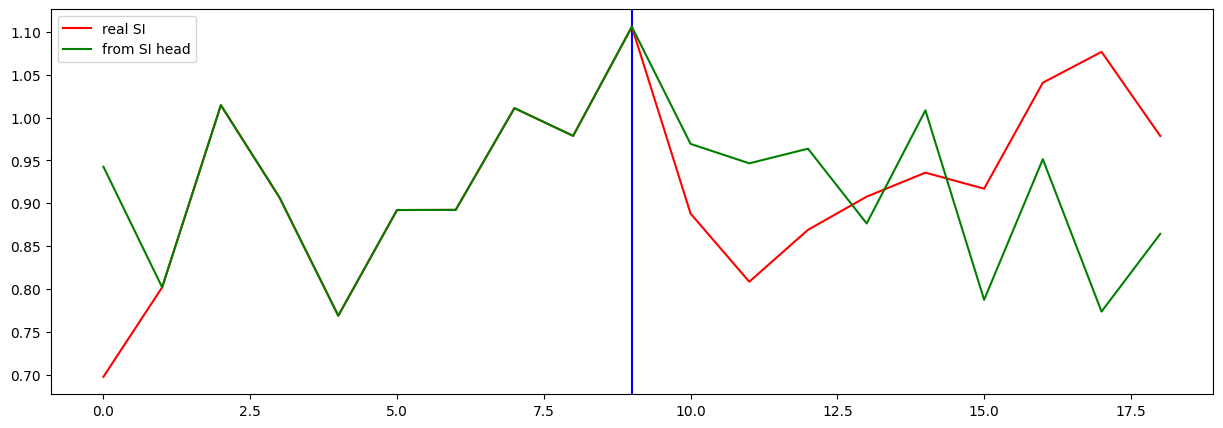

Testing R**2 - (all) - (no inputs):  0.9727019876274096
Testing R**2 - (f2) - SI full (no inputs):  -1.7193309253878168
Testing R**2 - SI head only (no inputs):  -0.8331689929293691
0 ...index R**2 (no inputs):  -2.1305373137990493
1 ...index R**2 (no inputs):  -1.7128246617946425
2 ...index R**2 (no inputs):  -1.7193309253878168
3 ...index R**2 (no inputs):  -23.973843344563488
4 ...index R**2 (no inputs):  -58.15774677477754
5 ...index R**2 (no inputs):  -1.0131375039440509
6 ...index R**2 (no inputs):  -69.17318921813423
7 ...index R**2 (no inputs):  -4.16440204499693
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.11664691803832472
10 ...index R**2 (no inputs):  0.16211190152963983
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -17.5762258129408
16 ...index R**2 (no inputs):  -0.1933530543938884
17 ...index R**2 (no inputs):  -466.3010721842

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.563437
Loss_SI: 0.4775664806365967 Loss_all: 1.3362720012664795
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.277999
Loss_SI: 0.21221600472927094 Loss_all: 0.8700509071350098
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.149609
Loss_SI: 0.10683155804872513 Loss_all: 0.5346022844314575
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.130594
Loss_SI: 0.08108790218830109 Loss_all: 0.5761529803276062
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.099027
Loss_SI: 0.05055525526404381 Loss_all: 0.5352704524993896
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.078455
Loss_SI: 0.03261679783463478 Loss_all: 0.49099957942962646
Prediction shape: torch.Size([32, 35])
===


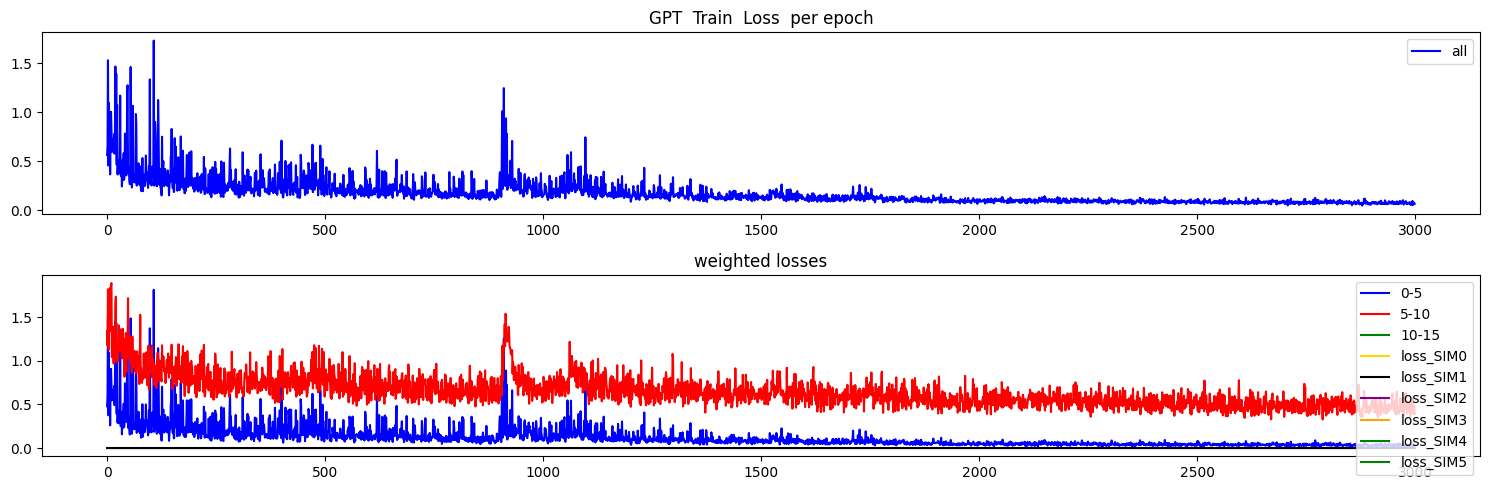

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


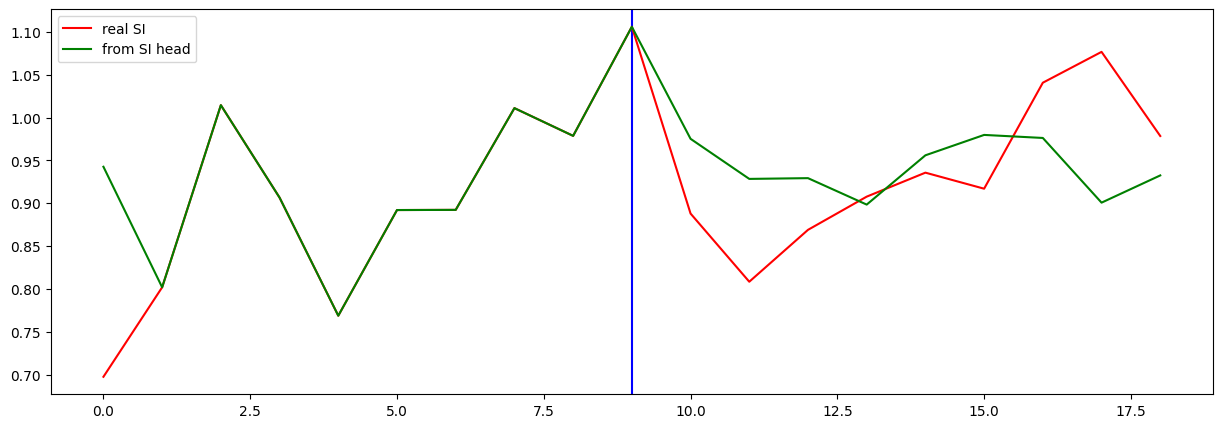

Testing R**2 - (all) - (no inputs):  0.928622652267515
Testing R**2 - (f2) - SI full (no inputs):  -1.058101432920728
Testing R**2 - SI head only (no inputs):  -0.023920576282524086
0 ...index R**2 (no inputs):  -0.2712445763939273
1 ...index R**2 (no inputs):  -1.2200968921724993
2 ...index R**2 (no inputs):  -1.058101432920728
3 ...index R**2 (no inputs):  -11.036034973283455
4 ...index R**2 (no inputs):  -2038.1744881388668
5 ...index R**2 (no inputs):  -4.272963014931419
6 ...index R**2 (no inputs):  -250.5793774577785
7 ...index R**2 (no inputs):  -3.592929017858652
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.05735413155167124
10 ...index R**2 (no inputs):  -0.06712186247565022
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -25.962643696096595
16 ...index R**2 (no inputs):  -3.158620217430335
17 ...index R**2 (no inputs):  -221.728075154

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.283507
Loss_SI: 0.2220093309879303 Loss_all: 0.8369812965393066
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.490295
Loss_SI: 0.377906858921051 Loss_all: 1.5017892122268677
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.185153
Loss_SI: 0.1391647607088089 Loss_all: 0.5990501046180725
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.194524
Loss_SI: 0.12973129749298096 Loss_all: 0.7776544690132141
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.130066
Loss_SI: 0.08633922785520554 Loss_all: 0.5236021876335144
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.117494
Loss_SI: 0.07566885650157928 Loss_all: 0.493924081325531
Prediction shape: torch.Size([32, 35])
===


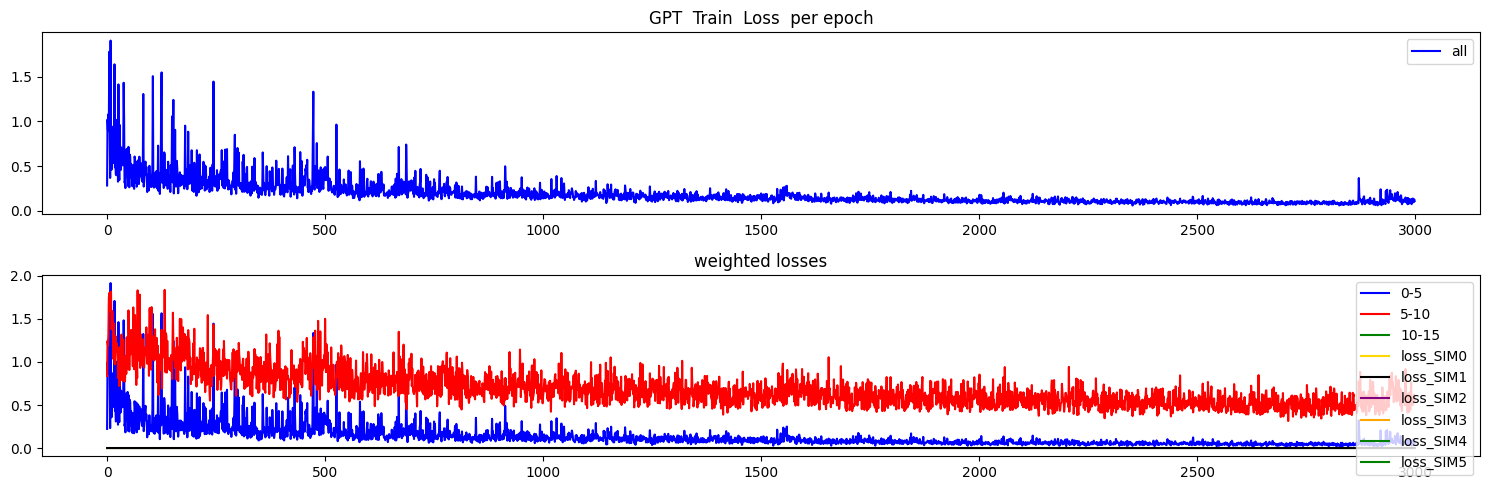

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


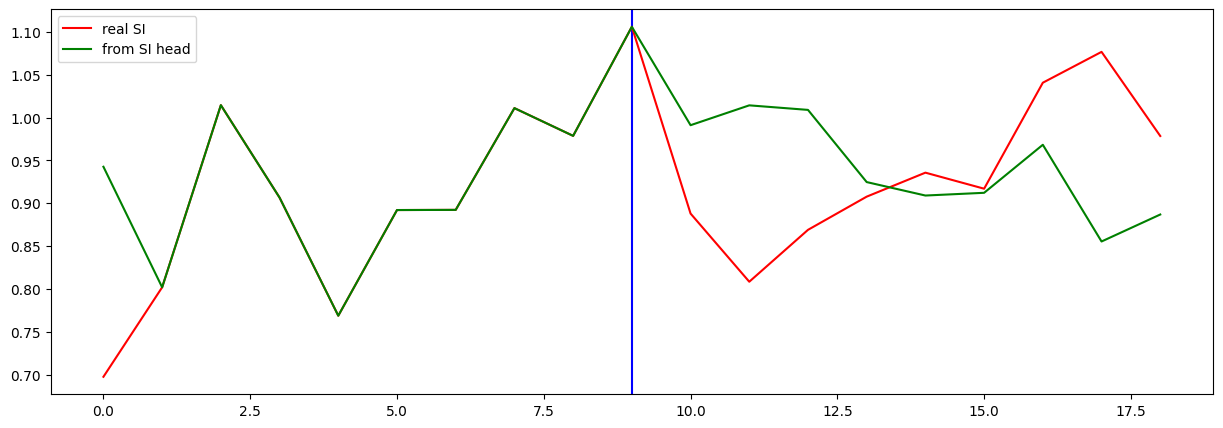

Testing R**2 - (all) - (no inputs):  0.9658108936426308
Testing R**2 - (f2) - SI full (no inputs):  -0.7520191871768835
Testing R**2 - SI head only (no inputs):  -0.3446737525611645
0 ...index R**2 (no inputs):  -1.0782213480139138
1 ...index R**2 (no inputs):  -0.4365320095700014
2 ...index R**2 (no inputs):  -0.7520191871768835
3 ...index R**2 (no inputs):  -2.7390605113860182
4 ...index R**2 (no inputs):  -388.188326098054
5 ...index R**2 (no inputs):  -1.3932822715212763
6 ...index R**2 (no inputs):  -593.1606751520019
7 ...index R**2 (no inputs):  -4.675414463731248
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09785712874401797
10 ...index R**2 (no inputs):  -0.2729624269967801
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -37.87239507460169
16 ...index R**2 (no inputs):  -3.1701047018431163
17 ...index R**2 (no inputs):  -24933.6397298

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.617037
Loss_SI: 0.553785502910614 Loss_all: 1.1863033771514893
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.099156
Loss_SI: 0.037170685827732086 Loss_all: 0.6570276021957397
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.078291
Loss_SI: 0.021060410887002945 Loss_all: 0.593364953994751
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.055845
Loss_SI: 0.016503412276506424 Loss_all: 0.4099147319793701
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.048997
Loss_SI: 0.012840285897254944 Loss_all: 0.37440699338912964
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.036323
Loss_SI: 0.008069755509495735 Loss_all: 0.2906014025211334
Prediction shape: torch.Size([32, 35])
===


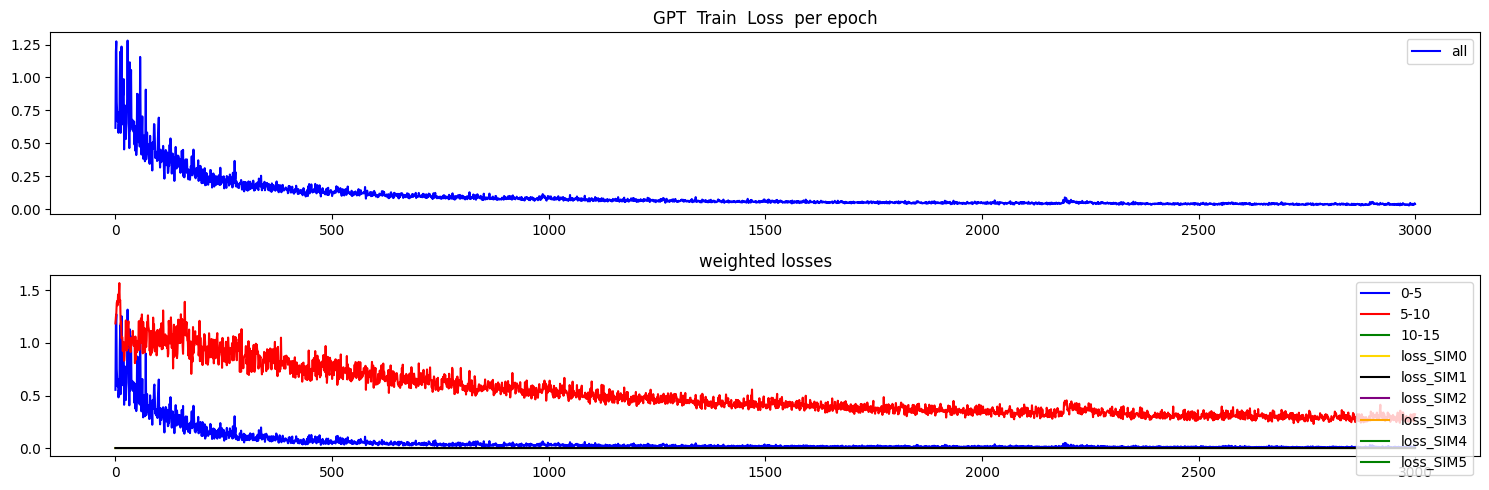

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


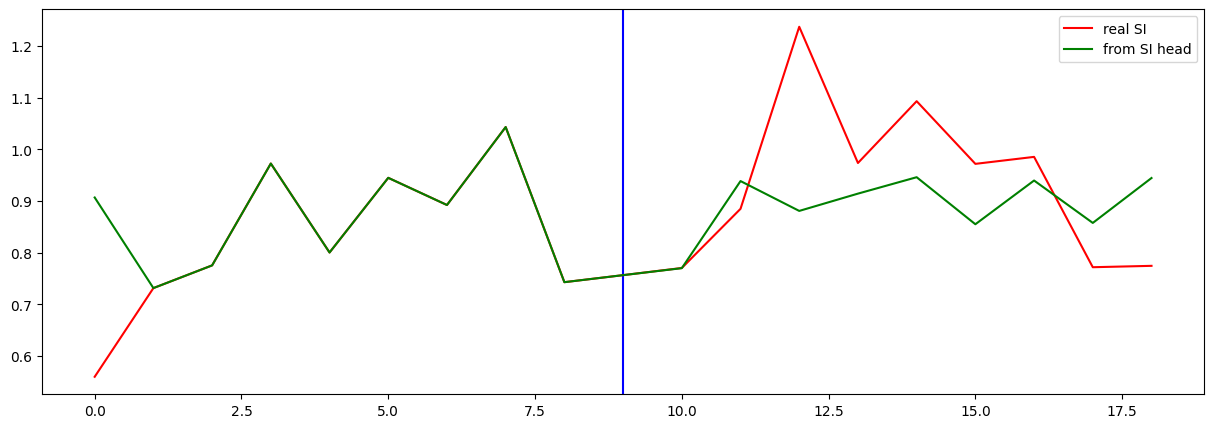

Testing R**2 - (all) - (no inputs):  0.9939051690169515
Testing R**2 - (f2) - SI full (no inputs):  -0.10318404188113095
Testing R**2 - SI head only (no inputs):  -0.0929634365796006
0 ...index R**2 (no inputs):  0.22906814955875976
1 ...index R**2 (no inputs):  -0.8569165580913378
2 ...index R**2 (no inputs):  -0.10318404188113095
3 ...index R**2 (no inputs):  -699.1149313514737
4 ...index R**2 (no inputs):  -0.0026009247529859003
5 ...index R**2 (no inputs):  -1374.0768440226225
6 ...index R**2 (no inputs):  -6.317749889300501
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.00792869602762547
10 ...index R**2 (no inputs):  -1.045193900824875
11 ...index R**2 (no inputs):  -23.762532364763803
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.087313300499557
16 ...index R**2 (no inputs):  -2.4840431924078197
17 ...index R**2 (no inputs):  -47.2835

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.905313
Loss_SI: 0.8651179075241089 Loss_all: 1.267066240310669
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.220337
Loss_SI: 0.15188899636268616 Loss_all: 0.8363727331161499
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.092173
Loss_SI: 0.04467823728919029 Loss_all: 0.5196305513381958
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.090218
Loss_SI: 0.045578788965940475 Loss_all: 0.4919743835926056
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.058150
Loss_SI: 0.024148225784301758 Loss_all: 0.36416417360305786
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.051998
Loss_SI: 0.017236564308404922 Loss_all: 0.3648489713668823
Prediction shape: torch.Size([32, 35])
===


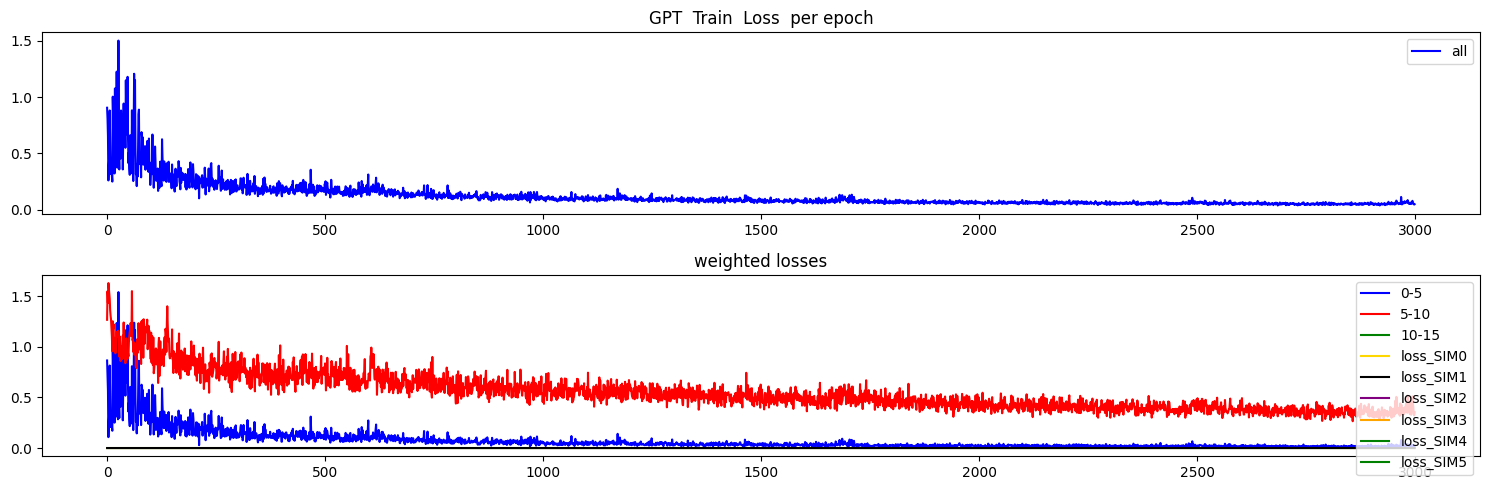

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


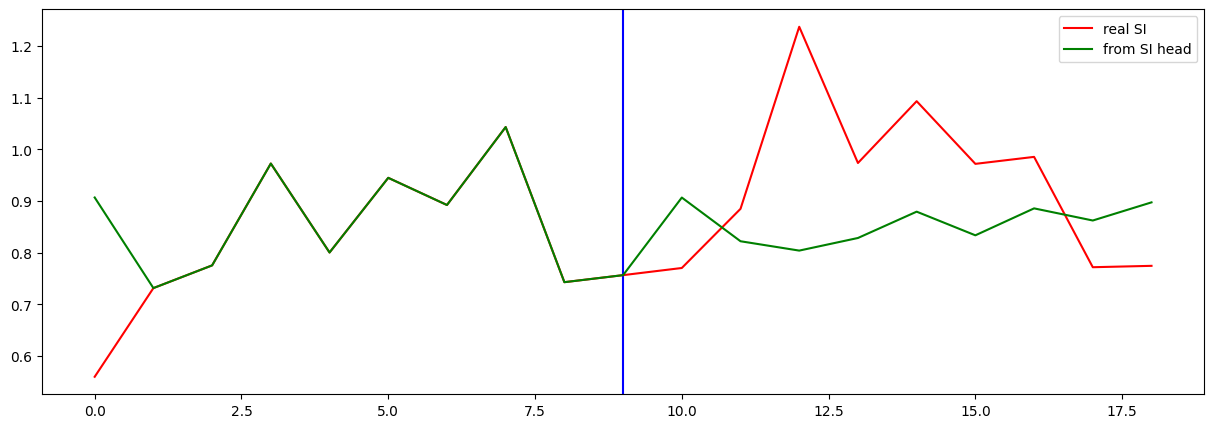

Testing R**2 - (all) - (no inputs):  0.9940153935302454
Testing R**2 - (f2) - SI full (no inputs):  -0.6202924401191179
Testing R**2 - SI head only (no inputs):  -0.392388567479691
0 ...index R**2 (no inputs):  -0.28665394563682844
1 ...index R**2 (no inputs):  -1.6468963513925465
2 ...index R**2 (no inputs):  -0.6202924401191179
3 ...index R**2 (no inputs):  -348.97948876740287
4 ...index R**2 (no inputs):  0.45928781737287083
5 ...index R**2 (no inputs):  -1352.9833091391206
6 ...index R**2 (no inputs):  -11.190296253902495
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.01263152432941761
10 ...index R**2 (no inputs):  -3.498160567334903
11 ...index R**2 (no inputs):  -6.573858878744526
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -10.779464673811493
16 ...index R**2 (no inputs):  -4.631260297583417
17 ...index R**2 (no inputs):  -6.6603618048

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.329349
Loss_SI: 0.25356972217559814 Loss_all: 1.011365294456482
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.276047
Loss_SI: 0.19589784741401672 Loss_all: 0.9973850846290588
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.221865
Loss_SI: 0.15399453043937683 Loss_all: 0.8326991200447083
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.128124
Loss_SI: 0.07749619334936142 Loss_all: 0.5837763547897339
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.125905
Loss_SI: 0.07084116339683533 Loss_all: 0.6214748024940491
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.119900
Loss_SI: 0.055280961096286774 Loss_all: 0.7014723420143127
Prediction shape: torch.Size([32, 35])
===


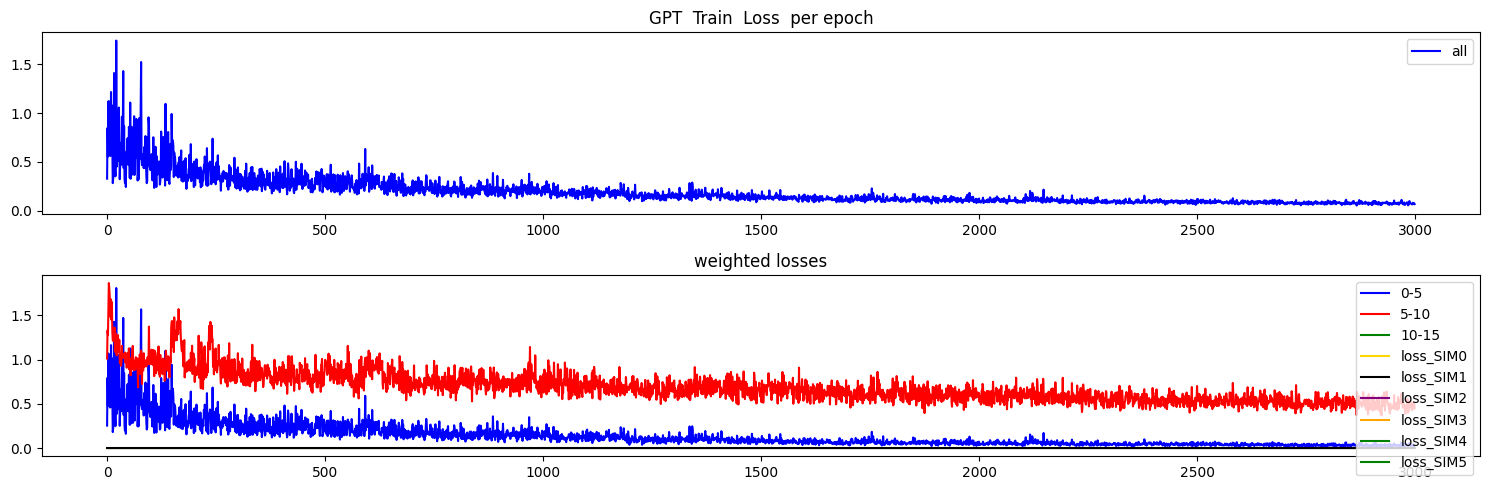

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


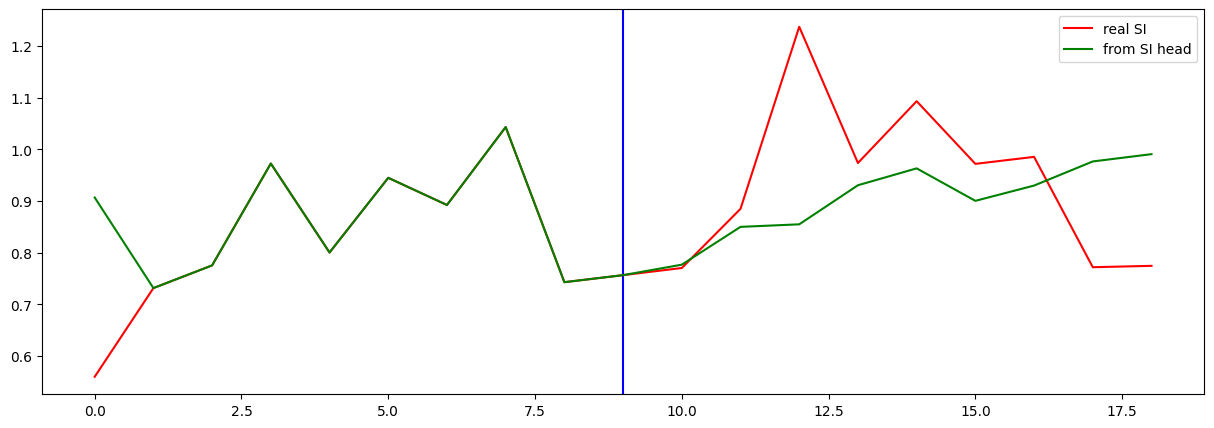

Testing R**2 - (all) - (no inputs):  0.9993788153688662
Testing R**2 - (f2) - SI full (no inputs):  -0.33320090192459606
Testing R**2 - SI head only (no inputs):  -0.4658657415483234
0 ...index R**2 (no inputs):  0.007358286284968707
1 ...index R**2 (no inputs):  -0.8903706106160392
2 ...index R**2 (no inputs):  -0.33320090192459606
3 ...index R**2 (no inputs):  -1566.8496773307513
4 ...index R**2 (no inputs):  -6.5827145612430025
5 ...index R**2 (no inputs):  -119.92483253014724
6 ...index R**2 (no inputs):  -11.932981381411798
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08314163317574241
10 ...index R**2 (no inputs):  -0.5572784882719799
11 ...index R**2 (no inputs):  -61.38871303779949
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6476714460982089
16 ...index R**2 (no inputs):  -0.388335743866957
17 ...index R**2 (no inputs):  -230.303

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.542009
Loss_SI: 0.47348877787590027 Loss_all: 1.1586874723434448
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.423518
Loss_SI: 0.3793317377567291 Loss_all: 0.8211977481842041
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.297038
Loss_SI: 0.234111949801445 Loss_all: 0.863372266292572
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.223144
Loss_SI: 0.16809941828250885 Loss_all: 0.7185444831848145
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.145081
Loss_SI: 0.0729660913348198 Loss_all: 0.7941128611564636
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.099096
Loss_SI: 0.0421900749206543 Loss_all: 0.6112510561943054
Prediction shape: torch.Size([32, 35])
===


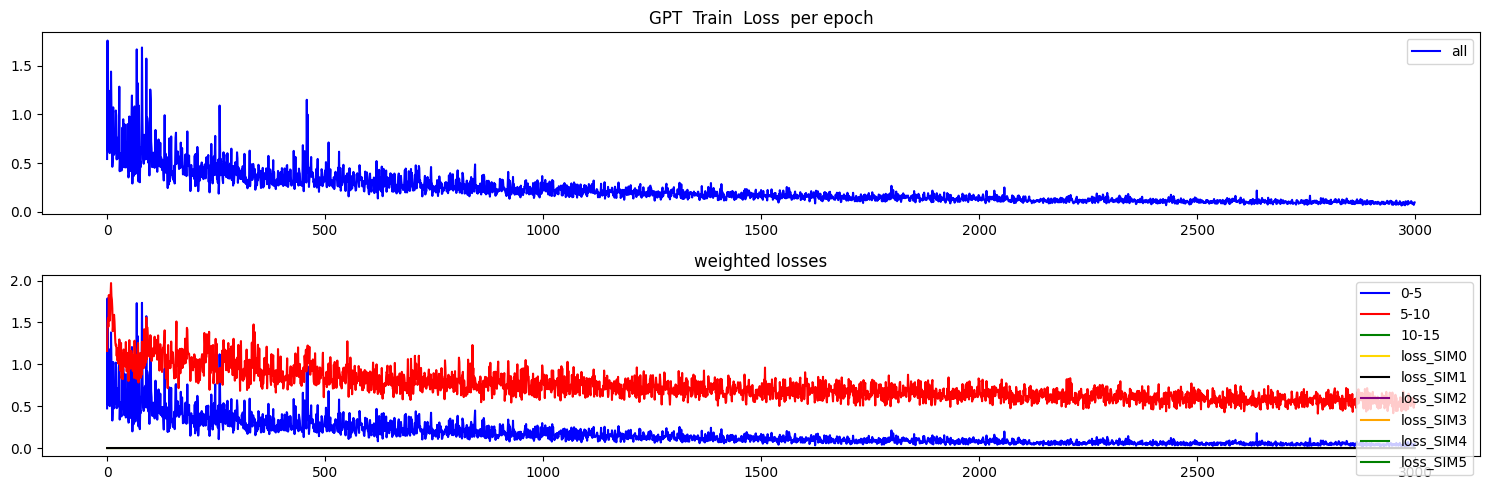

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


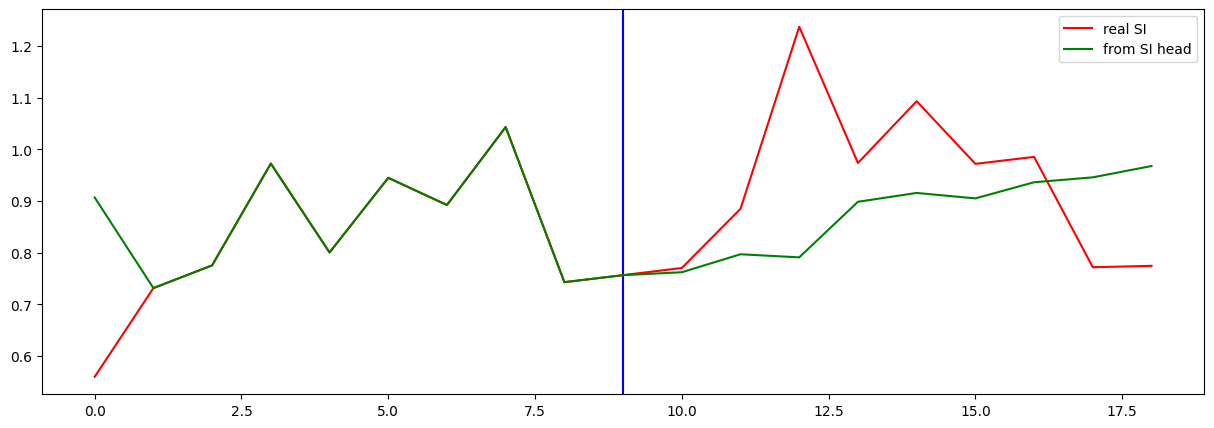

Testing R**2 - (all) - (no inputs):  0.9991452744273218
Testing R**2 - (f2) - SI full (no inputs):  -0.7829233204483008
Testing R**2 - SI head only (no inputs):  -0.6299578228754792
0 ...index R**2 (no inputs):  0.0874196106819175
1 ...index R**2 (no inputs):  -2.8611978637402933
2 ...index R**2 (no inputs):  -0.7829233204483008
3 ...index R**2 (no inputs):  -1693.532630072196
4 ...index R**2 (no inputs):  0.20988786991333863
5 ...index R**2 (no inputs):  -170.92014941476515
6 ...index R**2 (no inputs):  -8.494124784430989
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1650581236162023
10 ...index R**2 (no inputs):  -0.2322310831758283
11 ...index R**2 (no inputs):  -65.25181273001154
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.446833611635373
16 ...index R**2 (no inputs):  -0.8707584580916987
17 ...index R**2 (no inputs):  -352.4696360473

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.783534
Loss_SI: 0.7403812408447266 Loss_all: 1.1719058752059937
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.117532
Loss_SI: 0.052401863038539886 Loss_all: 0.7037010788917542
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.074571
Loss_SI: 0.036266475915908813 Loss_all: 0.4193098247051239
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.050182
Loss_SI: 0.018408983945846558 Loss_all: 0.3361380398273468
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.055436
Loss_SI: 0.020388279110193253 Loss_all: 0.3708627223968506
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.034956
Loss_SI: 0.012689576484262943 Loss_all: 0.23535077273845673
Prediction shape: torch.Size([32, 35])
===


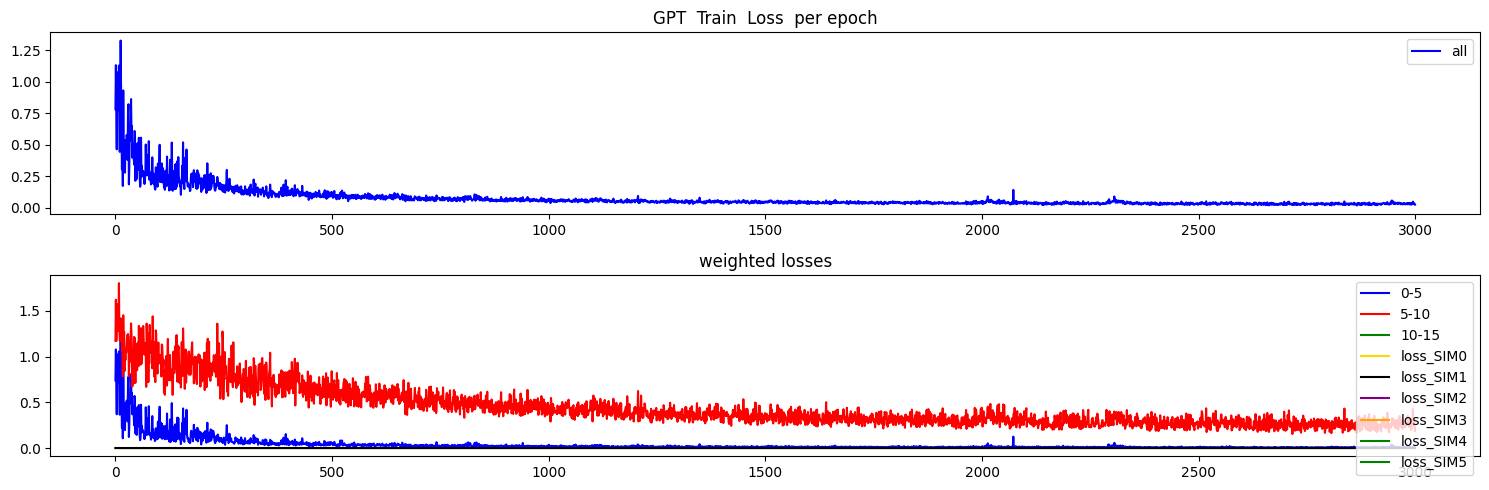

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


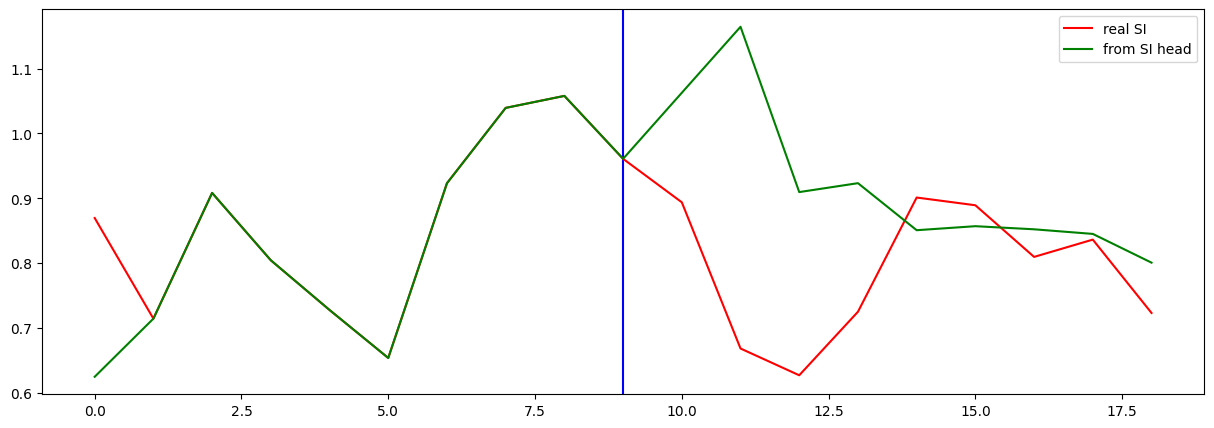

Testing R**2 - (all) - (no inputs):  0.9930922924793119
Testing R**2 - (f2) - SI full (no inputs):  -3.7009367747104838
Testing R**2 - SI head only (no inputs):  -5.226893146327171
0 ...index R**2 (no inputs):  -1.1856519417455123
1 ...index R**2 (no inputs):  -0.8203405613769856
2 ...index R**2 (no inputs):  -3.7009367747104838
3 ...index R**2 (no inputs):  -58.57822885123712
4 ...index R**2 (no inputs):  -9.717872520476062
5 ...index R**2 (no inputs):  -0.2295857173239677
6 ...index R**2 (no inputs):  -46.91731978797438
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.595163514702096
10 ...index R**2 (no inputs):  0.1969063660079563
11 ...index R**2 (no inputs):  -78.60171215078127
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.10747541248318626
16 ...index R**2 (no inputs):  0.06125030176570834
17 ...index R**2 (no inputs):  -8.8789579679645

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.535003
Loss_SI: 0.44965240359306335 Loss_all: 1.3031607866287231
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.094727
Loss_SI: 0.04519755393266678 Loss_all: 0.5404908061027527
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.123237
Loss_SI: 0.057683221995830536 Loss_all: 0.713219404220581
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.085384
Loss_SI: 0.026122871786355972 Loss_all: 0.6187361478805542
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.069835
Loss_SI: 0.02241497114300728 Loss_all: 0.49661532044410706
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.063031
Loss_SI: 0.022919707000255585 Loss_all: 0.4240373969078064
Prediction shape: torch.Size([32, 35])
===


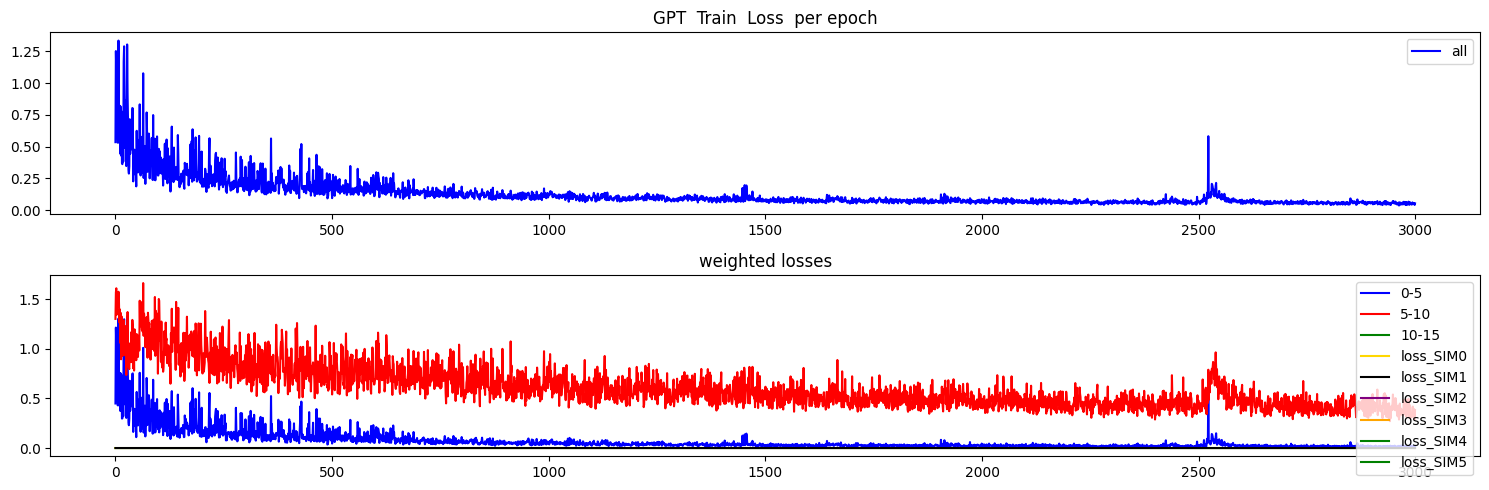

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


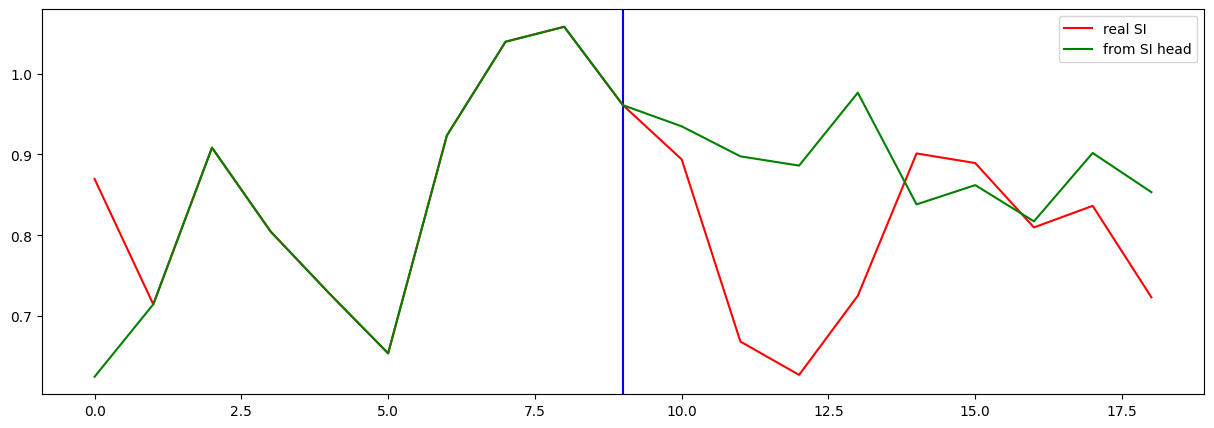

Testing R**2 - (all) - (no inputs):  0.981359627724621
Testing R**2 - (f2) - SI full (no inputs):  -0.9325533100809933
Testing R**2 - SI head only (no inputs):  -1.6466160192058608
0 ...index R**2 (no inputs):  0.10017813386225882
1 ...index R**2 (no inputs):  -5.746649425213182
2 ...index R**2 (no inputs):  -0.9325533100809933
3 ...index R**2 (no inputs):  -12.43844213963378
4 ...index R**2 (no inputs):  -14.627011161256162
5 ...index R**2 (no inputs):  -2.3248753195509617
6 ...index R**2 (no inputs):  -16.384894278375956
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.189741964816415
10 ...index R**2 (no inputs):  -0.4898341763964753
11 ...index R**2 (no inputs):  -86.13902762369013
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7829161951396542
16 ...index R**2 (no inputs):  0.05839328729364601
17 ...index R**2 (no inputs):  -6.398076736400

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.402299
Loss_SI: 0.32396411895751953 Loss_all: 1.1073168516159058
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.306760
Loss_SI: 0.24697566032409668 Loss_all: 0.8448172211647034
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.115663
Loss_SI: 0.052350182086229324 Loss_all: 0.6854767799377441
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.110887
Loss_SI: 0.04421455040574074 Loss_all: 0.7109360694885254
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.075397
Loss_SI: 0.030850647017359734 Loss_all: 0.47631222009658813
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.062137
Loss_SI: 0.024537768214941025 Loss_all: 0.4005286395549774
Prediction shape: torch.Size([32, 35])
===


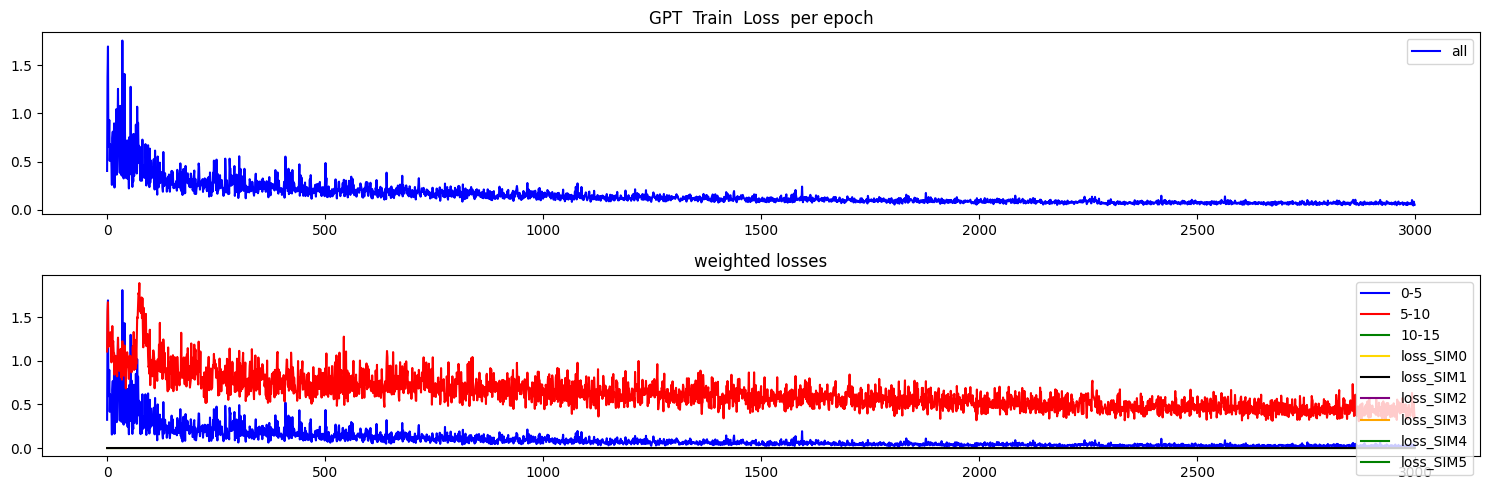

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


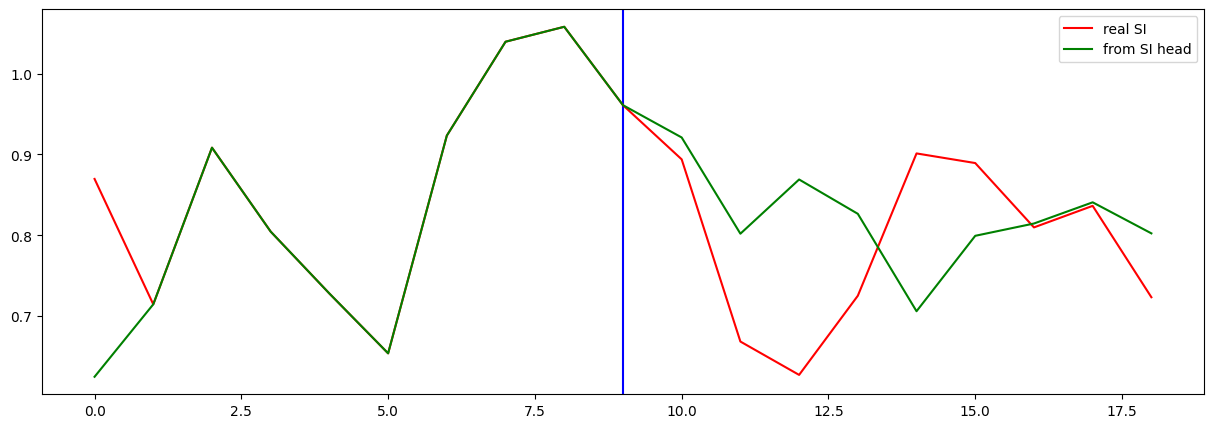

Testing R**2 - (all) - (no inputs):  0.986234787963915
Testing R**2 - (f2) - SI full (no inputs):  -4.7704337756848
Testing R**2 - SI head only (no inputs):  -1.1459004523315768
0 ...index R**2 (no inputs):  -1.1241879666023942
1 ...index R**2 (no inputs):  -2.0616483066766187
2 ...index R**2 (no inputs):  -4.7704337756848
3 ...index R**2 (no inputs):  -41.07562594418118
4 ...index R**2 (no inputs):  -76.81653213425302
5 ...index R**2 (no inputs):  -1.4470634652081187
6 ...index R**2 (no inputs):  -128.8729084033006
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7427129944664121
10 ...index R**2 (no inputs):  -0.29769645434980463
11 ...index R**2 (no inputs):  -39.7011685074815
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8039079367822728
16 ...index R**2 (no inputs):  -0.5826642948137131
17 ...index R**2 (no inputs):  -375.32892318646265
1

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.731555
Loss_SI: 0.6919009685516357 Loss_all: 1.0884438753128052
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.266583
Loss_SI: 0.1840013563632965 Loss_all: 1.0098145008087158
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.207121
Loss_SI: 0.14848299324512482 Loss_all: 0.7348589301109314
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.114502
Loss_SI: 0.056642964482307434 Loss_all: 0.6352325677871704
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.153835
Loss_SI: 0.10571036487817764 Loss_all: 0.5869596600532532
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.137162
Loss_SI: 0.08135025948286057 Loss_all: 0.6394709348678589
Prediction shape: torch.Size([32, 35])
===


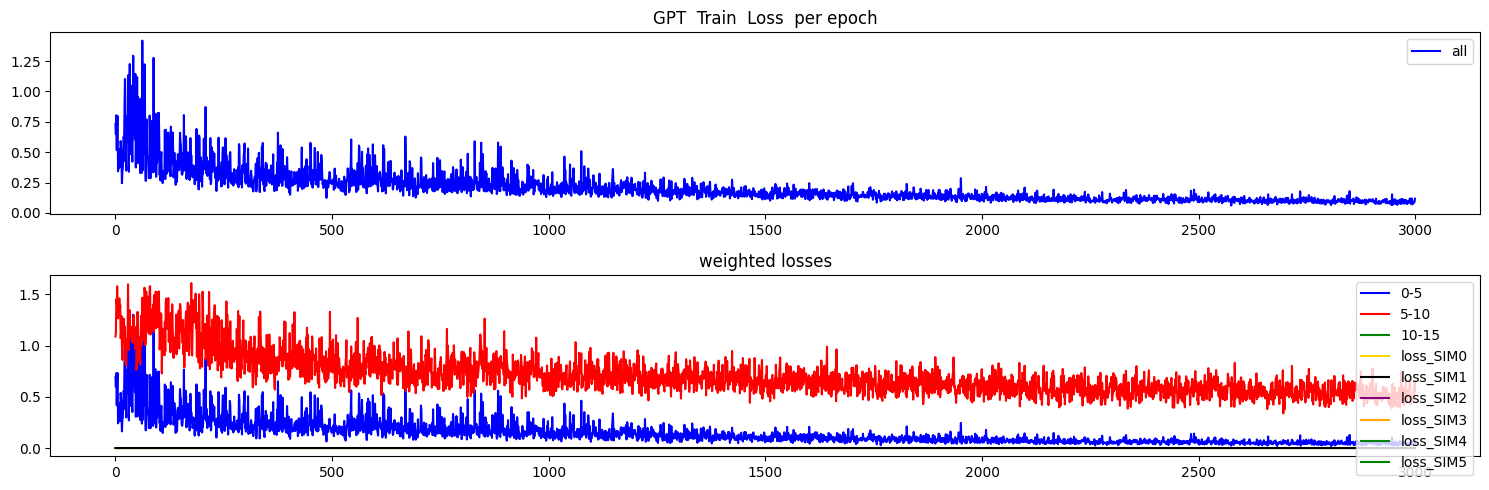

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


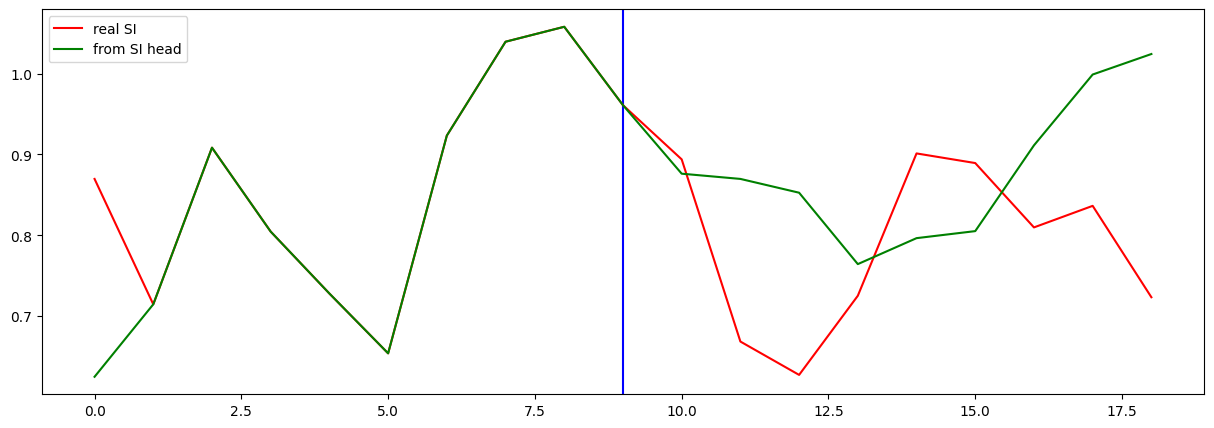

Testing R**2 - (all) - (no inputs):  0.9933147510410725
Testing R**2 - (f2) - SI full (no inputs):  -0.07694723364694966
Testing R**2 - SI head only (no inputs):  -2.1122828428900595
0 ...index R**2 (no inputs):  0.045395047602007854
1 ...index R**2 (no inputs):  -2.575842762975814
2 ...index R**2 (no inputs):  -0.07694723364694966
3 ...index R**2 (no inputs):  -139.826644639149
4 ...index R**2 (no inputs):  -355.8046021428262
5 ...index R**2 (no inputs):  -0.13879283292140365
6 ...index R**2 (no inputs):  -112.09578725284742
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.1818751981471003
10 ...index R**2 (no inputs):  -1.8421622256974914
11 ...index R**2 (no inputs):  -186.72686932194458
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.577042370445445
16 ...index R**2 (no inputs):  -0.3013986382802514
17 ...index R**2 (no inputs):  -2625.31324

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.863144
Loss_SI: 0.805150032043457 Loss_all: 1.3850862979888916
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.113222
Loss_SI: 0.05352091044187546 Loss_all: 0.6505322456359863
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.057912
Loss_SI: 0.016101842746138573 Loss_all: 0.4342055022716522
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.050127
Loss_SI: 0.013863760977983475 Loss_all: 0.37649574875831604
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.040115
Loss_SI: 0.00897733774036169 Loss_all: 0.3203491270542145
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.034579
Loss_SI: 0.010586252436041832 Loss_all: 0.250509649515152
Prediction shape: torch.Size([32, 35])
===


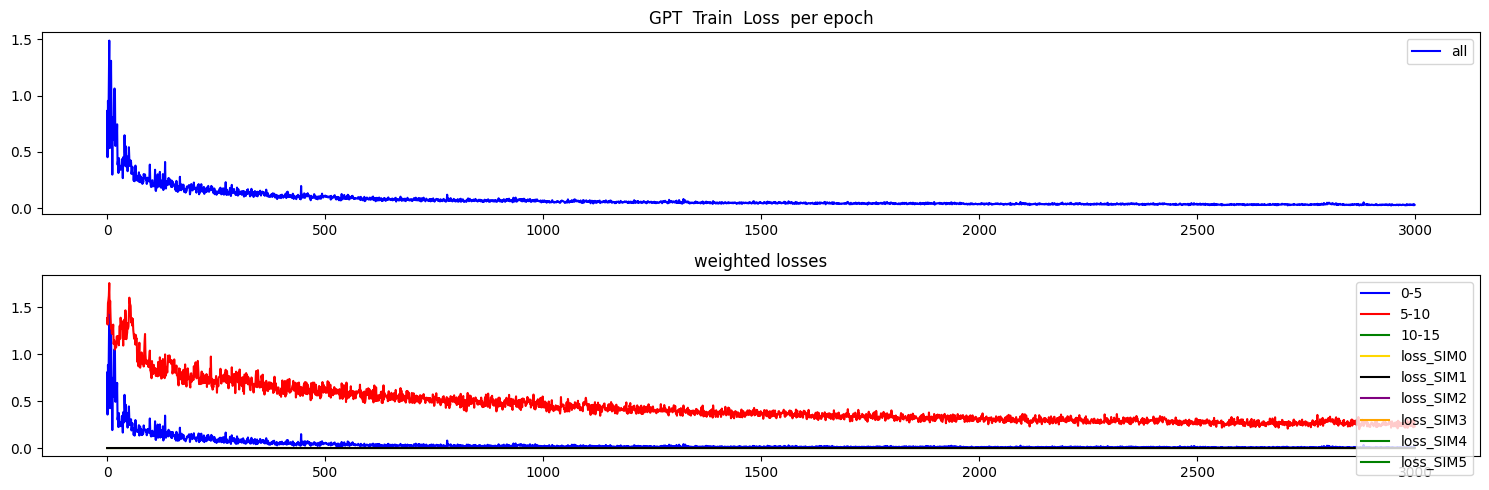

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


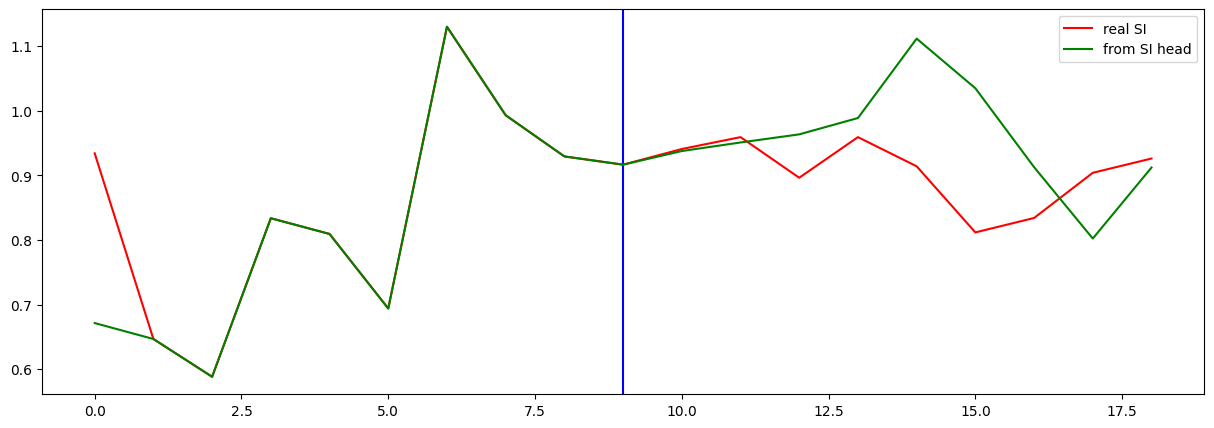

Testing R**2 - (all) - (no inputs):  0.9908608537134286
Testing R**2 - (f2) - SI full (no inputs):  -6.8712149136220635
Testing R**2 - SI head only (no inputs):  -6.372078033504207
0 ...index R**2 (no inputs):  -8.538347934387916
1 ...index R**2 (no inputs):  -2.514660050600713
2 ...index R**2 (no inputs):  -6.8712149136220635
3 ...index R**2 (no inputs):  -20.002103684404243
4 ...index R**2 (no inputs):  -335.89152447643585
5 ...index R**2 (no inputs):  -42.91626404318509
6 ...index R**2 (no inputs):  -37.616330780383535
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4322144861406505
10 ...index R**2 (no inputs):  -0.5532517054104871
11 ...index R**2 (no inputs):  -218.30765316936203
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -11.250267922786259
16 ...index R**2 (no inputs):  -0.4320841082099569
17 ...index R**2 (no inputs):  -495.909574461

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.533039
Loss_SI: 0.4630400538444519 Loss_all: 1.1630276441574097
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.139231
Loss_SI: 0.08039866387844086 Loss_all: 0.6687223315238953
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.128209
Loss_SI: 0.07965457439422607 Loss_all: 0.5652004480361938
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.100217
Loss_SI: 0.053996674716472626 Loss_all: 0.516198456287384
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.066415
Loss_SI: 0.023759428411722183 Loss_all: 0.45031335949897766
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.050462
Loss_SI: 0.01378241553902626 Loss_all: 0.3805752992630005
Prediction shape: torch.Size([32, 35])
===


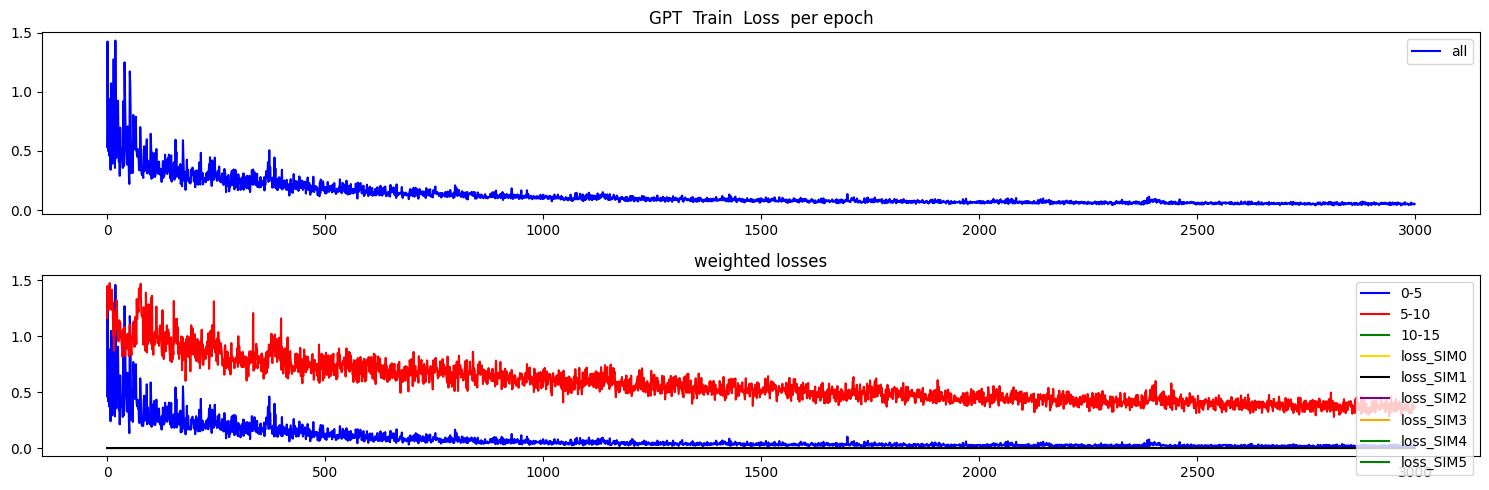

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


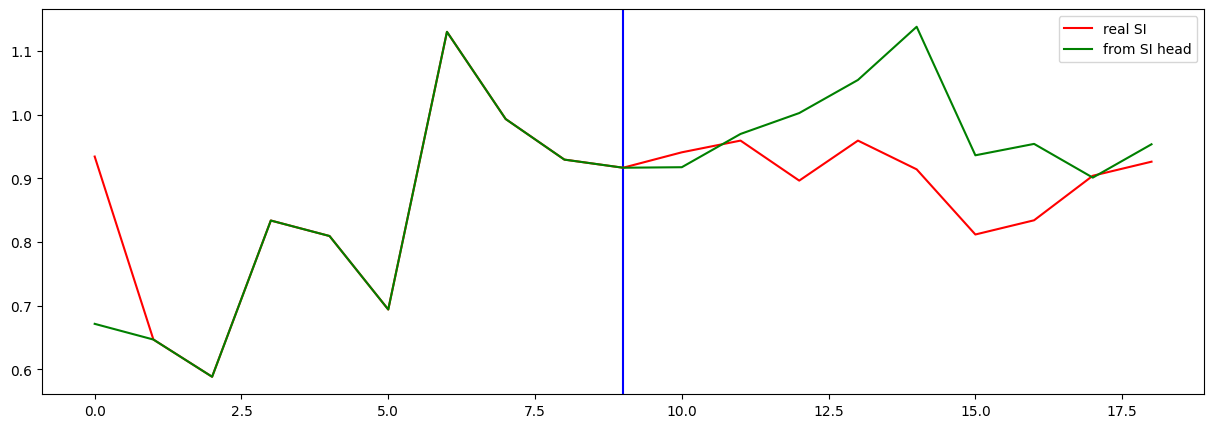

Testing R**2 - (all) - (no inputs):  0.994439730051163
Testing R**2 - (f2) - SI full (no inputs):  -9.384440536582366
Testing R**2 - SI head only (no inputs):  -6.078474827122934
0 ...index R**2 (no inputs):  -4.65809373489952
1 ...index R**2 (no inputs):  -0.3032350692235106
2 ...index R**2 (no inputs):  -9.384440536582366
3 ...index R**2 (no inputs):  -14.284802139457884
4 ...index R**2 (no inputs):  -122.97430261217787
5 ...index R**2 (no inputs):  -24.4136059277472
6 ...index R**2 (no inputs):  -28.502176084974543
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.072807852362542
10 ...index R**2 (no inputs):  -0.6241507207415651
11 ...index R**2 (no inputs):  -1563.2885287050935
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.399119912627274
16 ...index R**2 (no inputs):  -2.0147065913592637
17 ...index R**2 (no inputs):  -2246.301651146762
1

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.209244
Loss_SI: 1.194290280342102 Loss_all: 1.3438334465026855
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.348284
Loss_SI: 0.2792515456676483 Loss_all: 0.9695753455162048
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.172445
Loss_SI: 0.09209203720092773 Loss_all: 0.8956173062324524
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.108799
Loss_SI: 0.05625200271606445 Loss_all: 0.5817204713821411
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.125895
Loss_SI: 0.05868327617645264 Loss_all: 0.7307991981506348
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.077327
Loss_SI: 0.028036732226610184 Loss_all: 0.5209408402442932
Prediction shape: torch.Size([32, 35])
===


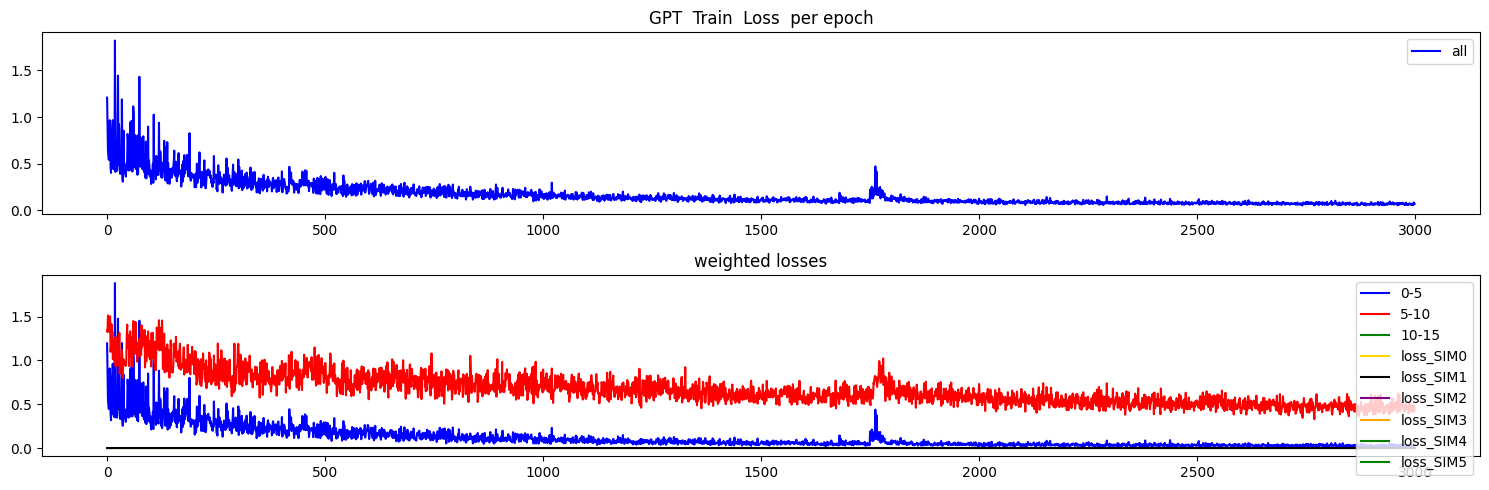

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


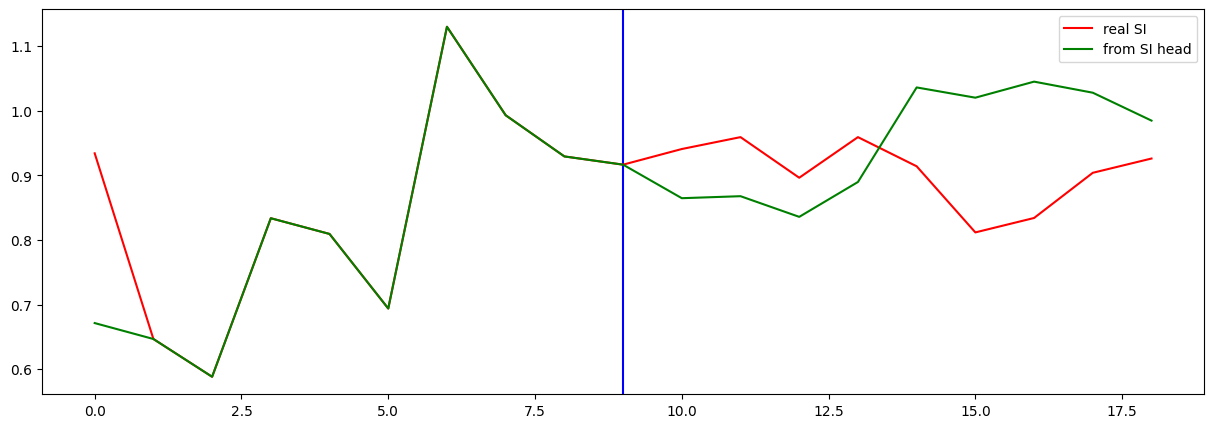

Testing R**2 - (all) - (no inputs):  0.9929452774122164
Testing R**2 - (f2) - SI full (no inputs):  -14.927120315583371
Testing R**2 - SI head only (no inputs):  -5.812598698872095
0 ...index R**2 (no inputs):  -4.924710031530878
1 ...index R**2 (no inputs):  -7.562884405270154
2 ...index R**2 (no inputs):  -14.927120315583371
3 ...index R**2 (no inputs):  -6.033691287727835
4 ...index R**2 (no inputs):  -955.4123215051395
5 ...index R**2 (no inputs):  -31.465335710133417
6 ...index R**2 (no inputs):  -144.46111159210673
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9825810208553118
10 ...index R**2 (no inputs):  -0.20360835243861275
11 ...index R**2 (no inputs):  -327.2977331329911
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -12.124380735513547
16 ...index R**2 (no inputs):  -1.3346382505700012
17 ...index R**2 (no inputs):  -2457.411949196

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.555972
Loss_SI: 0.4810127019882202 Loss_all: 1.2306067943572998
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.428101
Loss_SI: 0.4067733883857727 Loss_all: 0.6200490593910217
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.270056
Loss_SI: 0.19131475687026978 Loss_all: 0.9787265062332153
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.211554
Loss_SI: 0.15713366866111755 Loss_all: 0.7013388276100159
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.123088
Loss_SI: 0.06758267432451248 Loss_all: 0.6226401925086975
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.122915
Loss_SI: 0.08030518144369125 Loss_all: 0.5064070820808411
Prediction shape: torch.Size([32, 35])
===


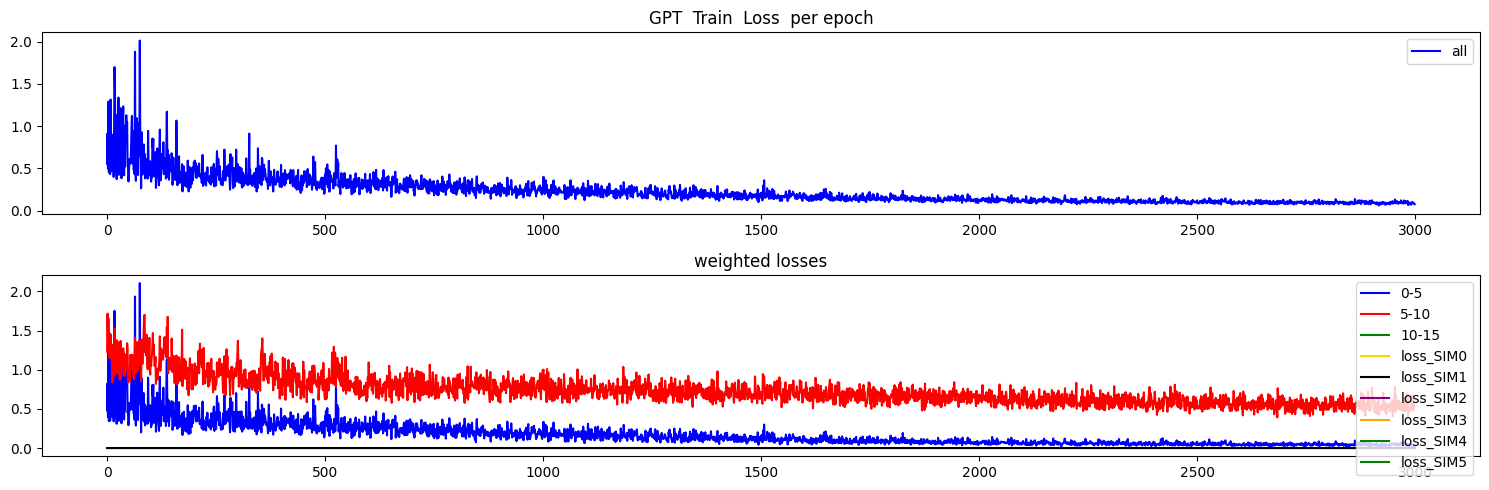

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


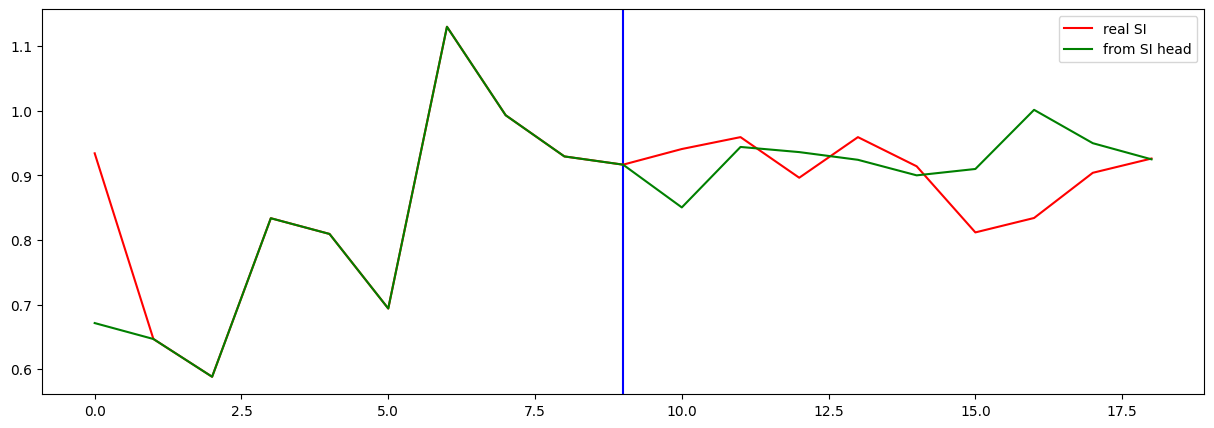

Testing R**2 - (all) - (no inputs):  0.9256974260201817
Testing R**2 - (f2) - SI full (no inputs):  -5.800742433029999
Testing R**2 - SI head only (no inputs):  -0.8258371170381025
0 ...index R**2 (no inputs):  -4.283839752276531
1 ...index R**2 (no inputs):  -0.9961600543046043
2 ...index R**2 (no inputs):  -5.800742433029999
3 ...index R**2 (no inputs):  -117.30213908998498
4 ...index R**2 (no inputs):  -6450.492807243483
5 ...index R**2 (no inputs):  -361.5308263890406
6 ...index R**2 (no inputs):  -177.12255663444589
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4493249755203841
10 ...index R**2 (no inputs):  -0.18579915633978095
11 ...index R**2 (no inputs):  -80.68933139782254
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -25.183673660086264
16 ...index R**2 (no inputs):  0.5033490752799149
17 ...index R**2 (no inputs):  -133.67582145757

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.894404
Loss_SI: 0.8223614692687988 Loss_all: 1.5427842140197754
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.119064
Loss_SI: 0.05464005470275879 Loss_all: 0.6988769173622131
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.072623
Loss_SI: 0.019814394414424896 Loss_all: 0.5478973984718323
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.061813
Loss_SI: 0.02131674811244011 Loss_all: 0.4262799024581909
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.049266
Loss_SI: 0.008545110002160072 Loss_all: 0.4157586991786957
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.044715
Loss_SI: 0.013466010801494122 Loss_all: 0.3259516656398773
Prediction shape: torch.Size([32, 35])
===


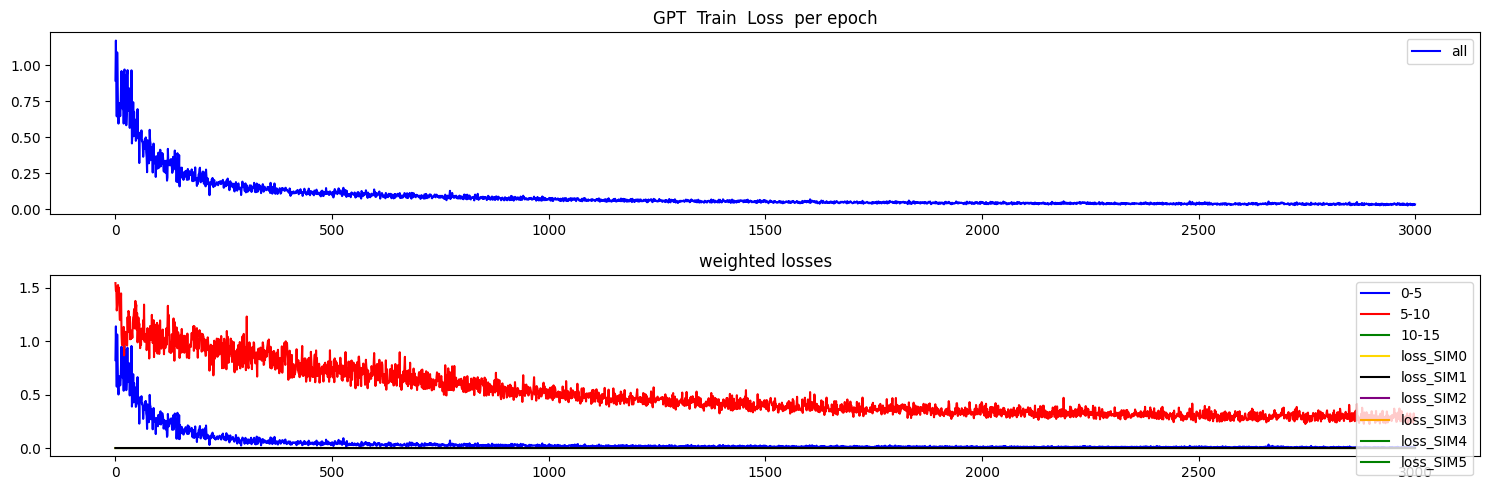

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


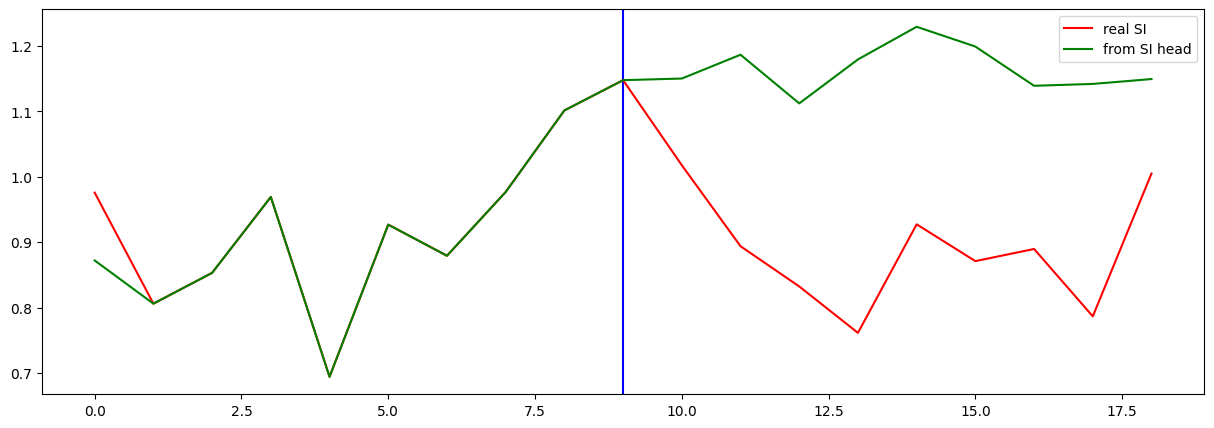

Testing R**2 - (all) - (no inputs):  0.9689754317105717
Testing R**2 - (f2) - SI full (no inputs):  -35.08325944933119
Testing R**2 - SI head only (no inputs):  -13.79204699386693
0 ...index R**2 (no inputs):  -0.0158587843362894
1 ...index R**2 (no inputs):  -14.504640733048996
2 ...index R**2 (no inputs):  -35.08325944933119
3 ...index R**2 (no inputs):  -2.326848615507377
4 ...index R**2 (no inputs):  -2.2401673929555628
5 ...index R**2 (no inputs):  -10.044874633807789
6 ...index R**2 (no inputs):  -13.983073287335804
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1206627825303932
10 ...index R**2 (no inputs):  -0.09497224866261411
11 ...index R**2 (no inputs):  -26.464316248659912
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -19.173248128100678
16 ...index R**2 (no inputs):  -1.9972057762171604
17 ...index R**2 (no inputs):  -25.319977736

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.793621
Loss_SI: 0.7303932905197144 Loss_all: 1.362669825553894
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.170199
Loss_SI: 0.07822069525718689 Loss_all: 0.998002290725708
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.101457
Loss_SI: 0.03556448221206665 Loss_all: 0.6944887638092041
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.111696
Loss_SI: 0.03888586536049843 Loss_all: 0.7669914960861206
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.091035
Loss_SI: 0.037014685571193695 Loss_all: 0.5772194266319275
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.065367
Loss_SI: 0.013185076415538788 Loss_all: 0.5350061058998108
Prediction shape: torch.Size([32, 35])
===


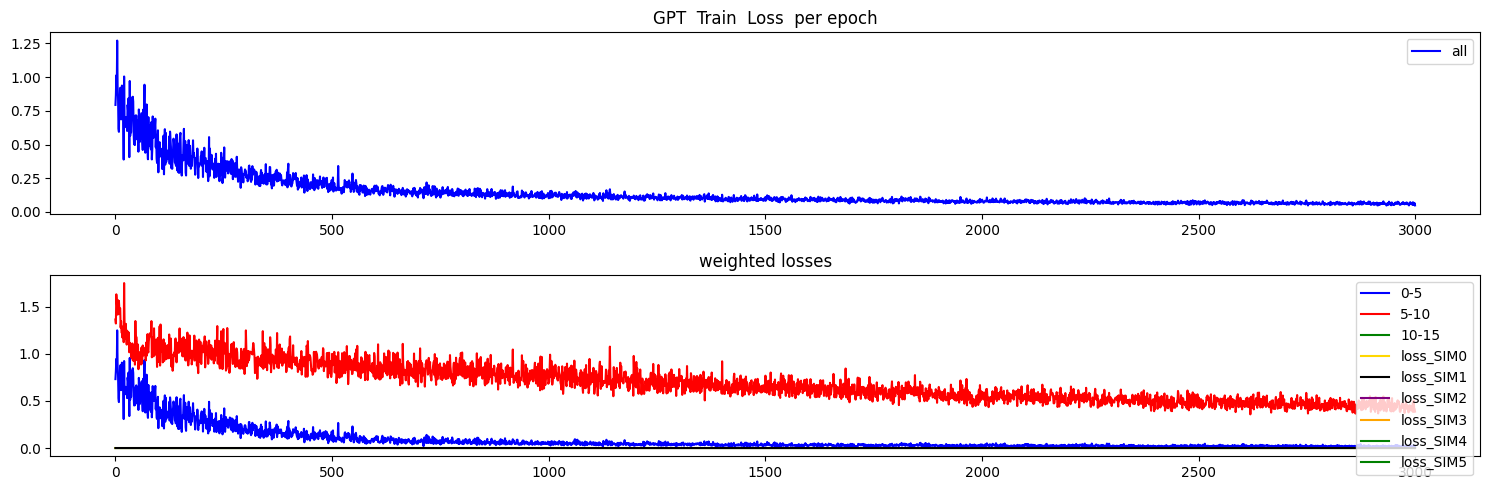

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


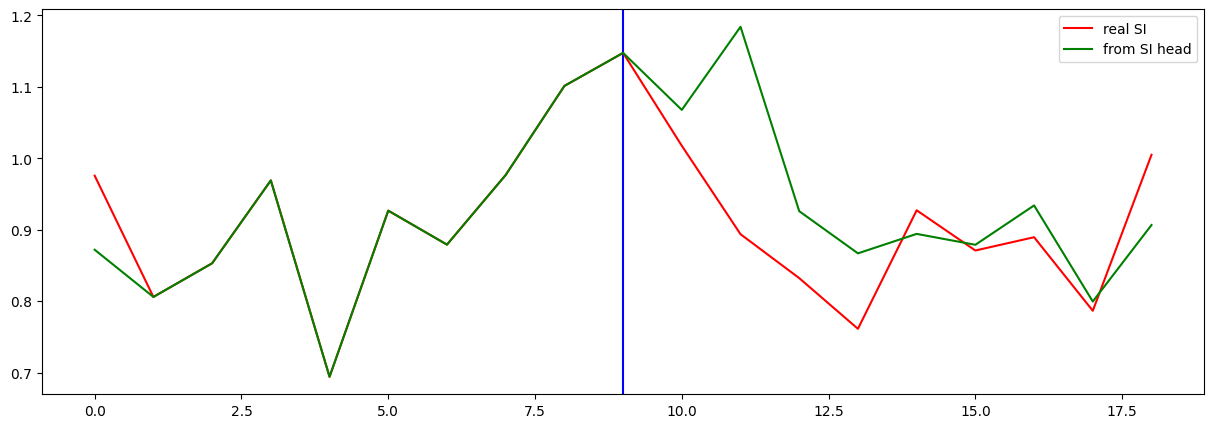

Testing R**2 - (all) - (no inputs):  0.9966877617596934
Testing R**2 - (f2) - SI full (no inputs):  -2.2489000849911625
Testing R**2 - SI head only (no inputs):  -3.8525909408825303
0 ...index R**2 (no inputs):  -1.183802959470016
1 ...index R**2 (no inputs):  -1.2416260564870227
2 ...index R**2 (no inputs):  -2.2489000849911625
3 ...index R**2 (no inputs):  -29.197430739516737
4 ...index R**2 (no inputs):  -15.326799159721041
5 ...index R**2 (no inputs):  -0.16408264557752483
6 ...index R**2 (no inputs):  -12.778381791671102
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7424081302207775
10 ...index R**2 (no inputs):  -0.15747761857633424
11 ...index R**2 (no inputs):  -388.40426689651855
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.023177207668166
16 ...index R**2 (no inputs):  -3.2240191929133397
17 ...index R**2 (no inputs):  -274.65335

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.649442
Loss_SI: 0.6131188869476318 Loss_all: 0.9763474464416504
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.237746
Loss_SI: 0.15526218712329865 Loss_all: 0.9800984263420105
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.196370
Loss_SI: 0.1359732747077942 Loss_all: 0.7399436831474304
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.110966
Loss_SI: 0.046395882964134216 Loss_all: 0.6920982003211975
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.096258
Loss_SI: 0.03283451497554779 Loss_all: 0.6670712232589722
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.095692
Loss_SI: 0.040056392550468445 Loss_all: 0.5964083075523376
Prediction shape: torch.Size([32, 35])
===


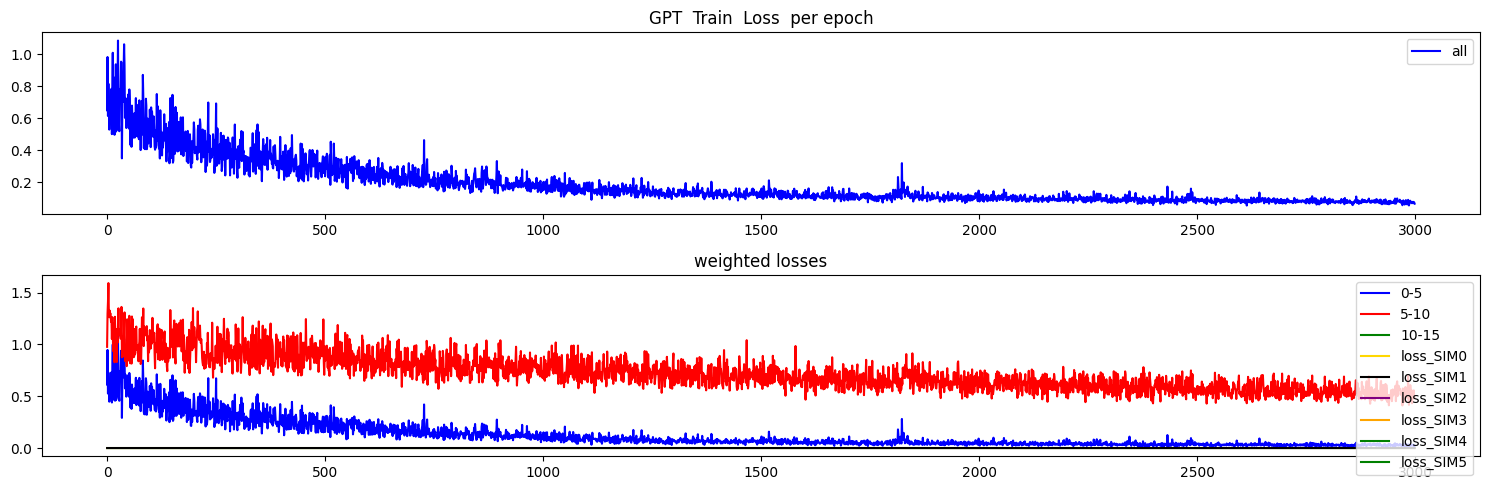

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


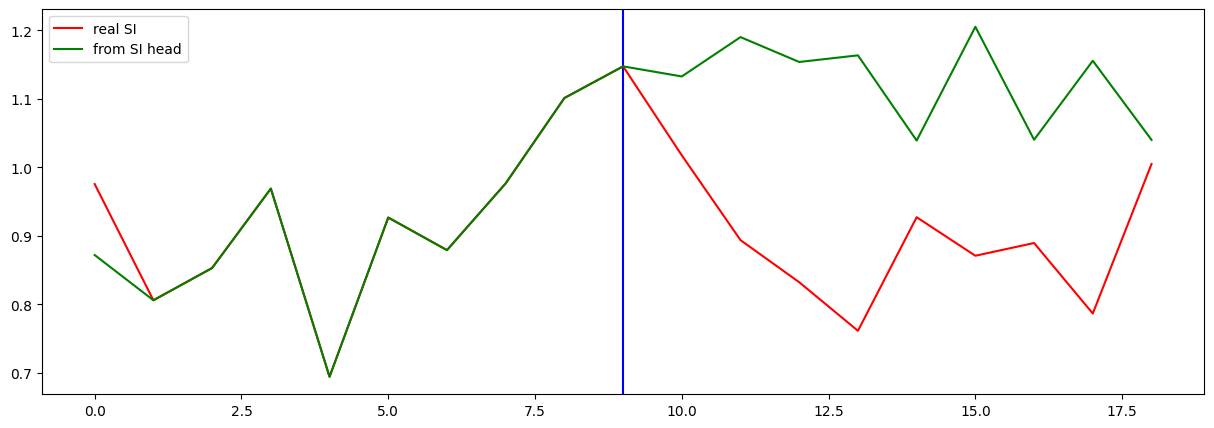

Testing R**2 - (all) - (no inputs):  0.9919895756984527
Testing R**2 - (f2) - SI full (no inputs):  -7.8879690534821645
Testing R**2 - SI head only (no inputs):  -10.737904255201743
0 ...index R**2 (no inputs):  -0.4074387134044126
1 ...index R**2 (no inputs):  -8.047550286284393
2 ...index R**2 (no inputs):  -7.8879690534821645
3 ...index R**2 (no inputs):  -17.08788585039158
4 ...index R**2 (no inputs):  -13.757394520789951
5 ...index R**2 (no inputs):  -1.83197437179969
6 ...index R**2 (no inputs):  -15.10908967905436
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1637904795601024
10 ...index R**2 (no inputs):  -0.8165525960507829
11 ...index R**2 (no inputs):  -22.651199104341707
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.56023780107953
16 ...index R**2 (no inputs):  -1.5416526170965121
17 ...index R**2 (no inputs):  -233.118724592526

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.659218
Loss_SI: 0.5970425605773926 Loss_all: 1.2187954187393188
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.374592
Loss_SI: 0.30205148458480835 Loss_all: 1.0274577140808105
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.256409
Loss_SI: 0.19005127251148224 Loss_all: 0.8536258935928345
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.141027
Loss_SI: 0.05630244314670563 Loss_all: 0.9035529494285583
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.130318
Loss_SI: 0.071539007127285 Loss_all: 0.6593244671821594
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.151583
Loss_SI: 0.094501793384552 Loss_all: 0.6653156280517578
Prediction shape: torch.Size([32, 35])
===


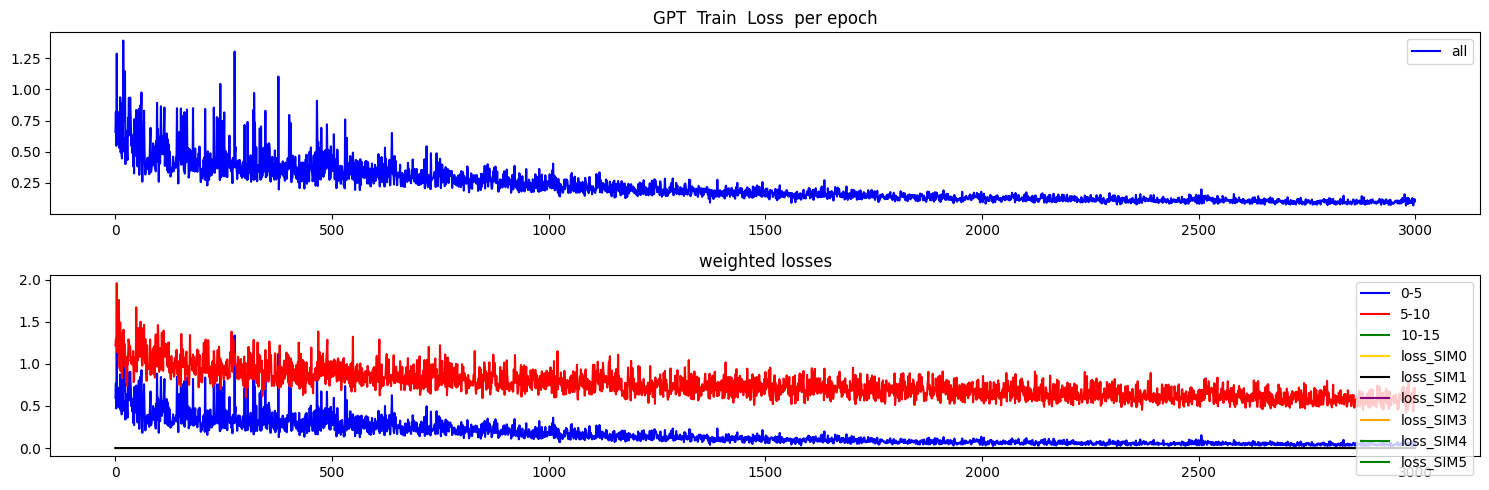

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


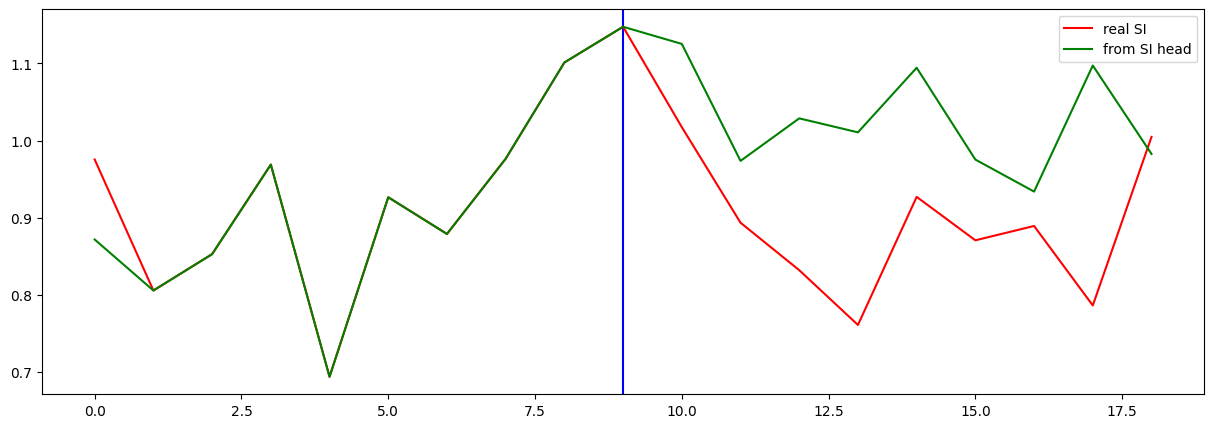

Testing R**2 - (all) - (no inputs):  0.9991301503093847
Testing R**2 - (f2) - SI full (no inputs):  -1.4510908104381475
Testing R**2 - SI head only (no inputs):  -3.581715615774205
0 ...index R**2 (no inputs):  -0.6282056280855504
1 ...index R**2 (no inputs):  -0.9032199894764879
2 ...index R**2 (no inputs):  -1.4510908104381475
3 ...index R**2 (no inputs):  -52.04366901946609
4 ...index R**2 (no inputs):  -11.898922363889639
5 ...index R**2 (no inputs):  0.70261705939054
6 ...index R**2 (no inputs):  -84.06529409646907
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.05923013301519209
10 ...index R**2 (no inputs):  -0.2892439625723018
11 ...index R**2 (no inputs):  -1397.411372378098
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7677204978380145
16 ...index R**2 (no inputs):  -0.05240057591488756
17 ...index R**2 (no inputs):  -212.58549931844

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -1.7500287183540428


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.8181056279043608


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -1.1831809420812474


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.7236932231264235



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: -4.435073966021071
2 .....R² on first n steps: -2.177191380393845
3 .....R² on first n steps: -2.1794966366430812
4 .....R² on first n steps: -1.987595569878318
5 .....R² on first n steps: -2.482938414496137
6 .....R² on first n steps: -2.535964160332447
7 .....R² on first n steps: -2.4181278337456393
8 .....R² on first n steps: -2.1192557459349155
9 .....R² on first n steps: -1.7500287183540428


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: -1.6126945080861232
2 .....R² on first n steps: -1.0477733485450664
3 .....R² on first n steps: -0.9768379493263404
4 .....R² on first n steps: -0.968191957780419
5 .....R² on first n steps: -1.2363727203836943
6 .....R² on first n steps: -1.257331739079497
7 .....R² on first n steps: -1.0701080934767742
8 .....R² on first n steps: -1.0572695872562137
9 .....R² on first n steps: -0.8181056279043608


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: -2.4226082117785297
2 .....R² on first n steps: -0.9373230338964724
3 .....R² on first n steps: -1.2764108296699526
4 .....R² on first n steps: -1.1871219173994687
5 .....R² on first n steps: -1.4128220488930463
6 .....R² on first n steps: -1.52590961318616
7 .....R² on first n steps: -1.4438454705649395
8 .....R² on first n steps: -1.3298510484940782
9 .....R² on first n steps: -1.1831809420812474


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: -2.1742369467038314
2 .....R² on first n steps: -0.8195393671111739
3 .....R² on first n steps: -0.9384427638134594
4 .....R² on first n steps: -0.8265068446753772
5 .....R² on first n steps: -0.9460852075276591
6 .....R² on first n steps: -0.8392808858594583
7 .....R² on first n steps: -0.7548726582804106
8 .....R² on first n steps: -0.7888393067675086
9 .....R² on first n steps: -0.7236932231264235



## Plot


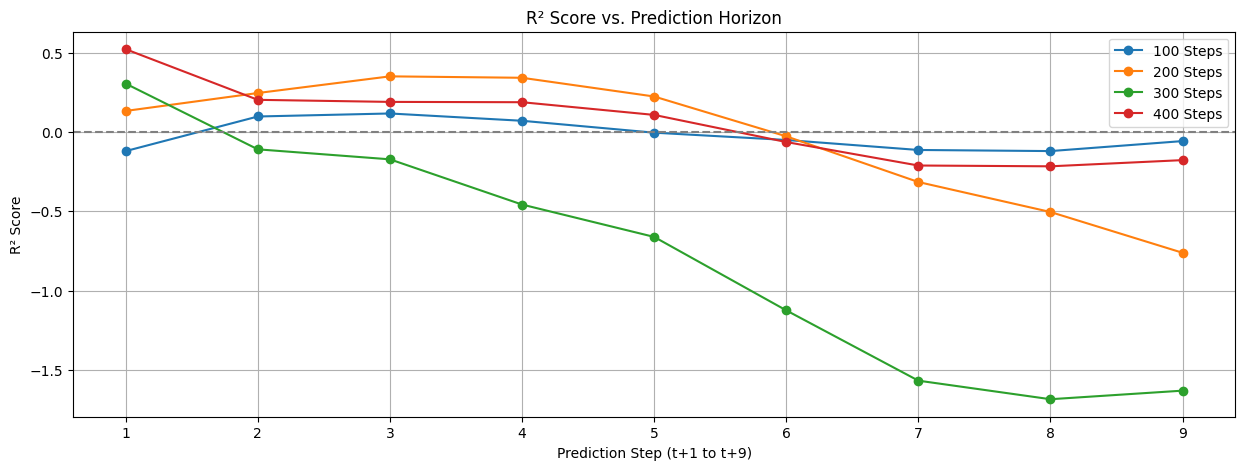

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
